## Enviromental Data from water
This dataset cosists of 25 ponds from which samples were taken in 3 different timepoints, at beggining(one week into experiment), midpoint(1 month into experiment) and end(3 months into experiment) of the experiment. 
This notebook will focus on microbiome data collected from sediment of watertanks holding fish with different probiotic supplementation added. Explanation of ponds can be found later in the notebook.

### Import and preprocessing

In [2]:
#libraries import
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize , LabelEncoder
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

from functions import *

np.random.seed(111)
tf.random.set_seed(111)

In [2]:
kf = KFold(n_splits=5, shuffle=True, random_state=111)

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/paq88/Fish_neural_network_classifier/refs/heads/main/H2O_based/Data/H2O_bacteria_merged.csv')
df.head()

pond  sample_id               ID  timepoint  \
0   S8        126    S8.126.H2O.S8          1   
1   S8        127    S8.127.H2O.S8          2   
2   S8        128    S8.128.H2O.S8          3   
3  S14        129  S14.129.H2O.S14          1   
4  S14        130  S14.130.H2O.S14          2   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae  \
0                                              517.0                                   
1                                              534.0                                   
2                                              200.0                                   
3                                              688.0                                   
4                                              479.0                                   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae  \
0                                               85.0                                     
1                                              318.0                                     
2                                              175.0                                     
3                                               13.0                                     
4                                              208.0                                     

   d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured  \
0                                              563.0                                  
1                                              423.0                                  
2                                               24.0                                  
3                                              168.0                                  
4                                              222.0                                  

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae  \
0                                             1030.0                                           
1                                              783.0                                           
2                                              725.0                                           
3                                             1696.0                                           
4                                              755.0                                           

   d__Bacteria;p__Planctomycetota;c__Planctomycetes;o__Isosphaerales;f__Isosphaeraceae  \
0                                                0.0                                     
1                                                0.0                                     
2                                               10.0                                     
3                                                2.0                                     
4                                                8.0                                     

   d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Rubritaleaceae  \
0                                                0.0                                              
1                                                0.0                                              
2                                              219.0                                              
3                                                0.0                                              
4                                                3.0                                              

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae;o__Kiritimatiellales;f__Kiritimatiellaceae  \
0                                                0.0                                                
1                                                0.0                                                
2                                    

In [4]:
predictors = df.columns[4:]
print("number of predictors: ", len(predictors))
df['timepoint'] = LabelEncoder().fit_transform(df['timepoint'])

df.shape

number of predictors:  186


(73, 190)

In [5]:
df[df['pond'] == "S29"]

pond  sample_id               ID  timepoint  \
11  S29        139  S29.139.H2O.S29          2   
12  S29        140  S29.140.H2O.S29          3   

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae  \
11                                              184.0                                   
12                                              129.0                                   

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae  \
11                                              270.0                                     
12                                              445.0                                     

    d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured  \
11                                              141.0                                  
12                                               26.0                                  

    d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae  \
11                                             1159.0                                           
12                                             1420.0                                           

    d__Bacteria;p__Planctomycetota;c__Planctomycetes;o__Isosphaerales;f__Isosphaeraceae  \
11                                               63.0                                     
12                                              377.0                                     

    d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Rubritaleaceae  \
11                                                0.0                                              
12                                              171.0                                              

    ...  \
11  ...   
12  ...   

    d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae;o__Kiritimatiellales;f__Kiritimatiellaceae  \
11                                                NaN                                                
12                                                NaN                                                

    d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Halothiobacillales;f__Halothiobacillaceae  \
11                                                NaN                                                   
12                                                NaN                                                   

    d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Propionibacteriales;f__Nocardioidaceae  \
11                                                NaN                                             
12                                                NaN                                             

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae  \
11                                                NaN                               
12                                                NaN                               

    d__Bacteria;p__Myxococcota;c__Polyangia;o__Polyangiales;f__Phaselicystidaceae  \
11                                                NaN                               
12                                                NaN                               

    d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;__  \
11                                                NaN                                 
12                                                NaN                                 

    d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridia;f__Hungateiclostridiaceae  \
11                                                NaN                                 
12                                                NaN                                 

    d__Bacteria;p__Patescibacteria;c__Parcubacteria;__;__  \
11                                                NaN       
12                                                NaN       

   

In [6]:
df[df['pond'] == "S18"]

pond  sample_id               ID  timepoint  \
6  S18        133  S18.133.H2O.S18          2   
7  S18        134  S18.134.H2O.S18          3   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae  \
6                                              375.0                                   
7                                              115.0                                   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae  \
6                                               25.0                                     
7                                              224.0                                     

   d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured  \
6                                               39.0                                  
7                                               64.0                                  

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae  \
6                                              772.0                                           
7                                              313.0                                           

   d__Bacteria;p__Planctomycetota;c__Planctomycetes;o__Isosphaerales;f__Isosphaeraceae  \
6                                               39.0                                     
7                                                8.0                                     

   d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Rubritaleaceae  \
6                                                NaN                                              
7                                                NaN                                              

   ...  \
6  ...   
7  ...   

   d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae;o__Kiritimatiellales;f__Kiritimatiellaceae  \
6                                                NaN                                                
7                                                NaN                                                

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Halothiobacillales;f__Halothiobacillaceae  \
6                                                NaN                                                   
7                                                NaN                                                   

   d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Propionibacteriales;f__Nocardioidaceae  \
6                                                NaN                                             
7                                                NaN                                             

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae  \
6                                                NaN                               
7                                                NaN                               

   d__Bacteria;p__Myxococcota;c__Polyangia;o__Polyangiales;f__Phaselicystidaceae  \
6                                                NaN                               
7                                                NaN                               

   d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;__  \
6                                                NaN                                 
7                                                NaN                                 

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridia;f__Hungateiclostridiaceae  \
6                                                NaN                                 
7                                                NaN                                 

   d__Bacteria;p__Patescibacteria;c__Parcubacteria;__;__  \
6                                                NaN       
7                                                NaN       

   d__Bacteria;p__Patescibacteria;c__Parcubacteria

We see that our dataset consists 186 different bacteria famillies which we will use as predictors for later analysis. We can also note that we have two missing samples from timepoint 0 ponds 29 and 18. 

Text(0.5, 0, 'Predictors')

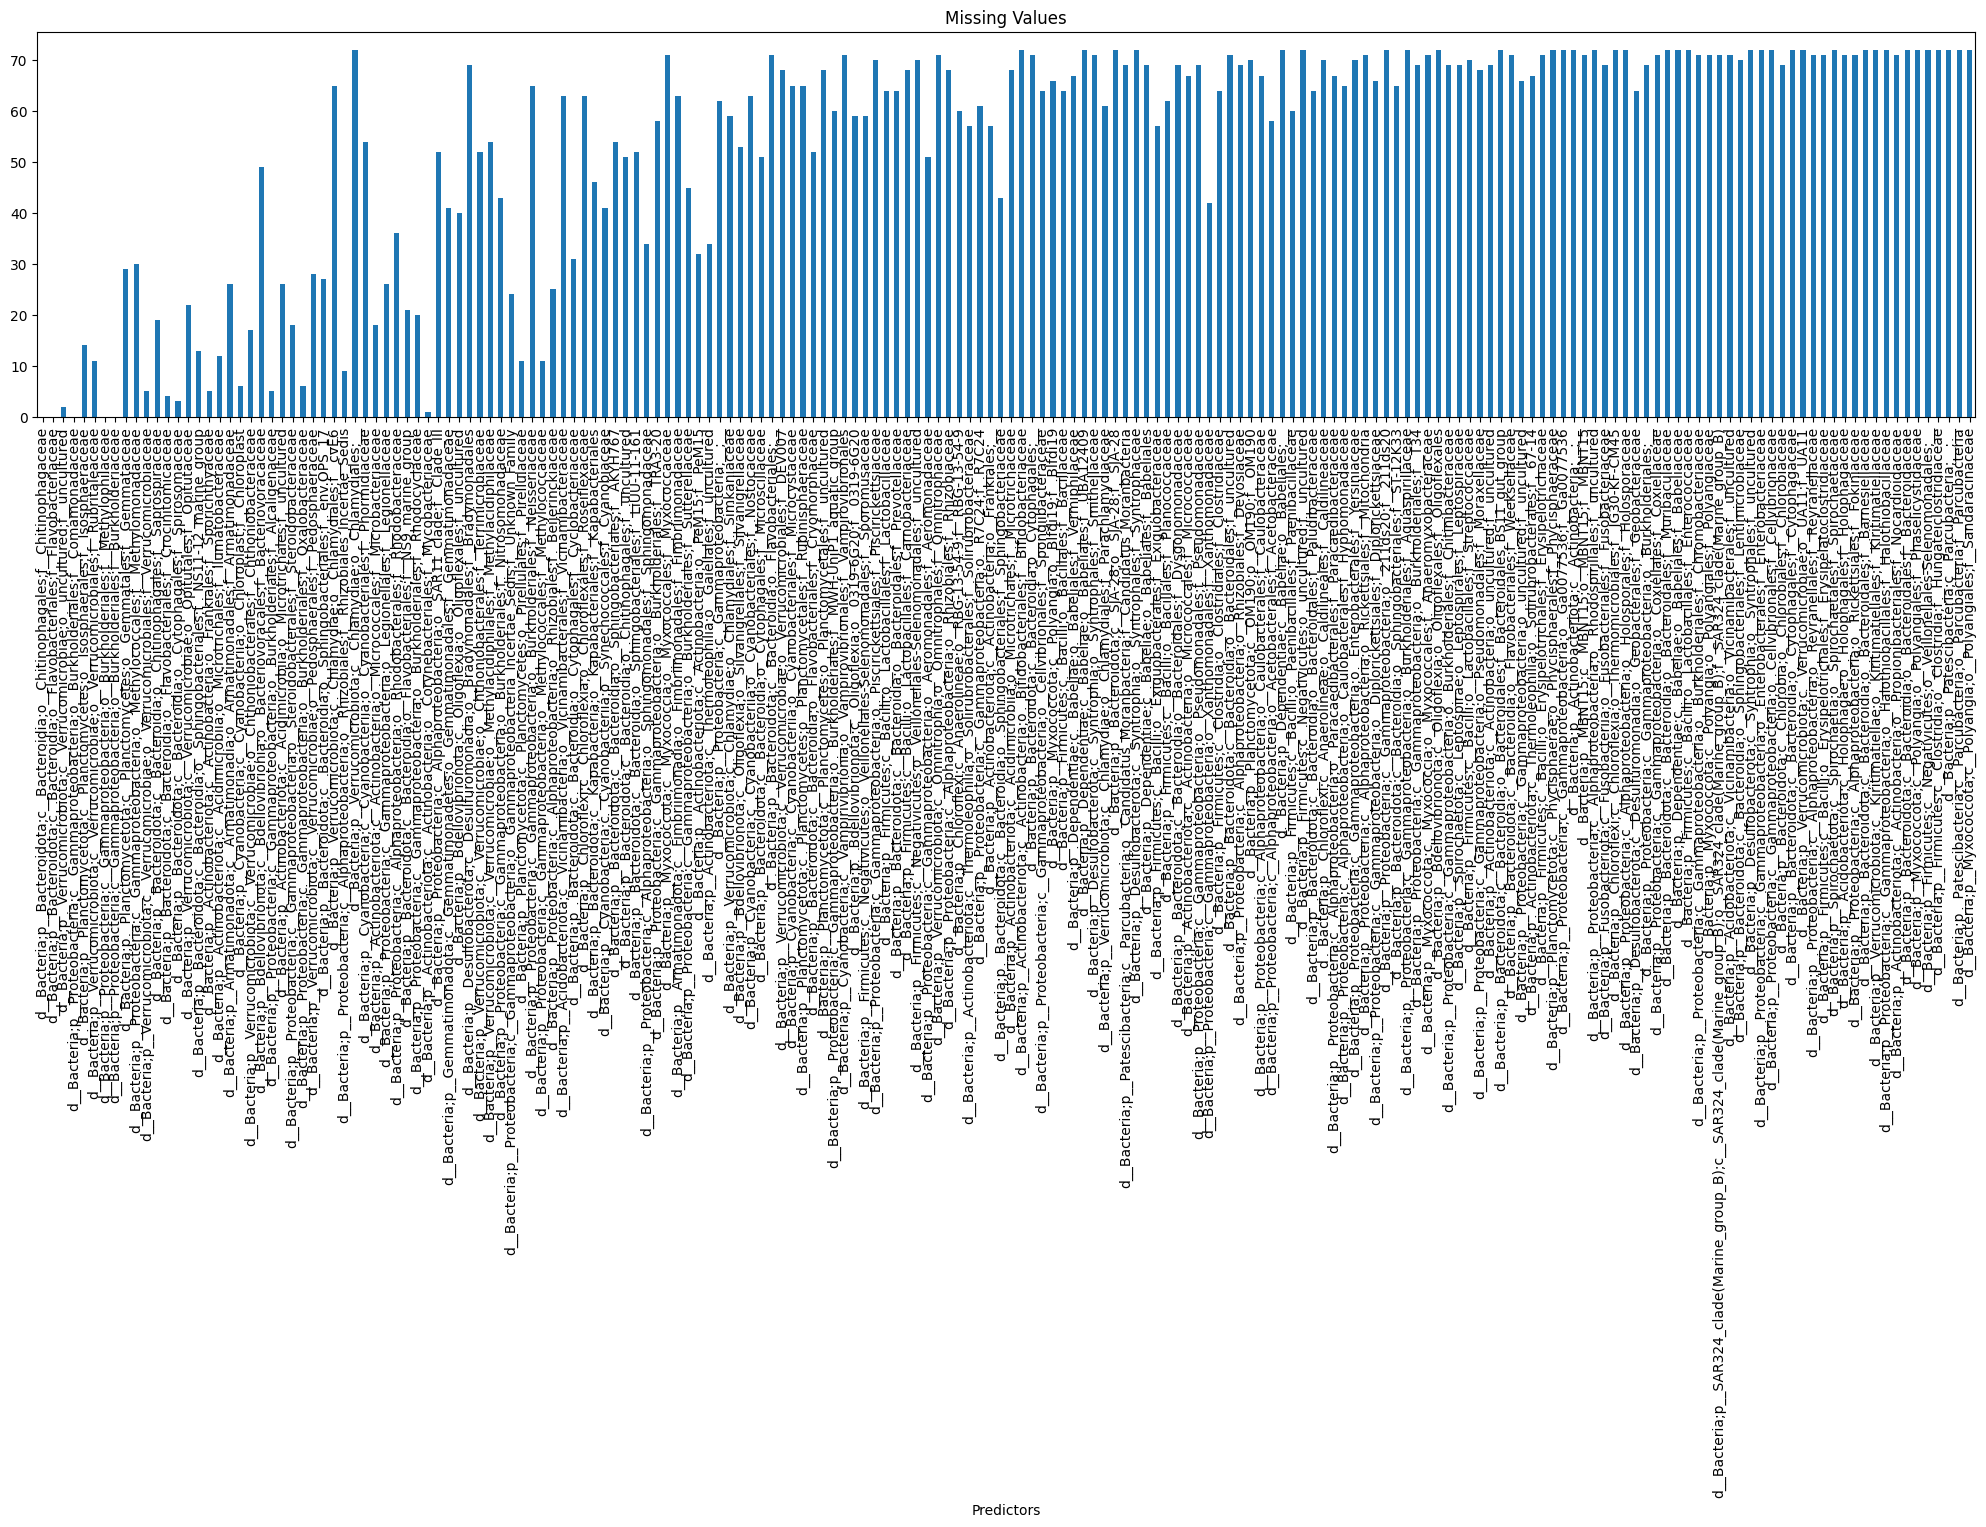

In [7]:
missing_or_zero = df[predictors].isna().sum() + (df[predictors] == 0).sum()

missing_or_zero.plot(kind='bar', figsize=(25, 5))
plt.title('Missing Values')
plt.xlabel('Predictors')

The distribution of missing values is quite similar to other datasets, we will once again fill missing values with 0 as it makes most biological sense.

In [8]:
df.fillna(0, inplace=True)

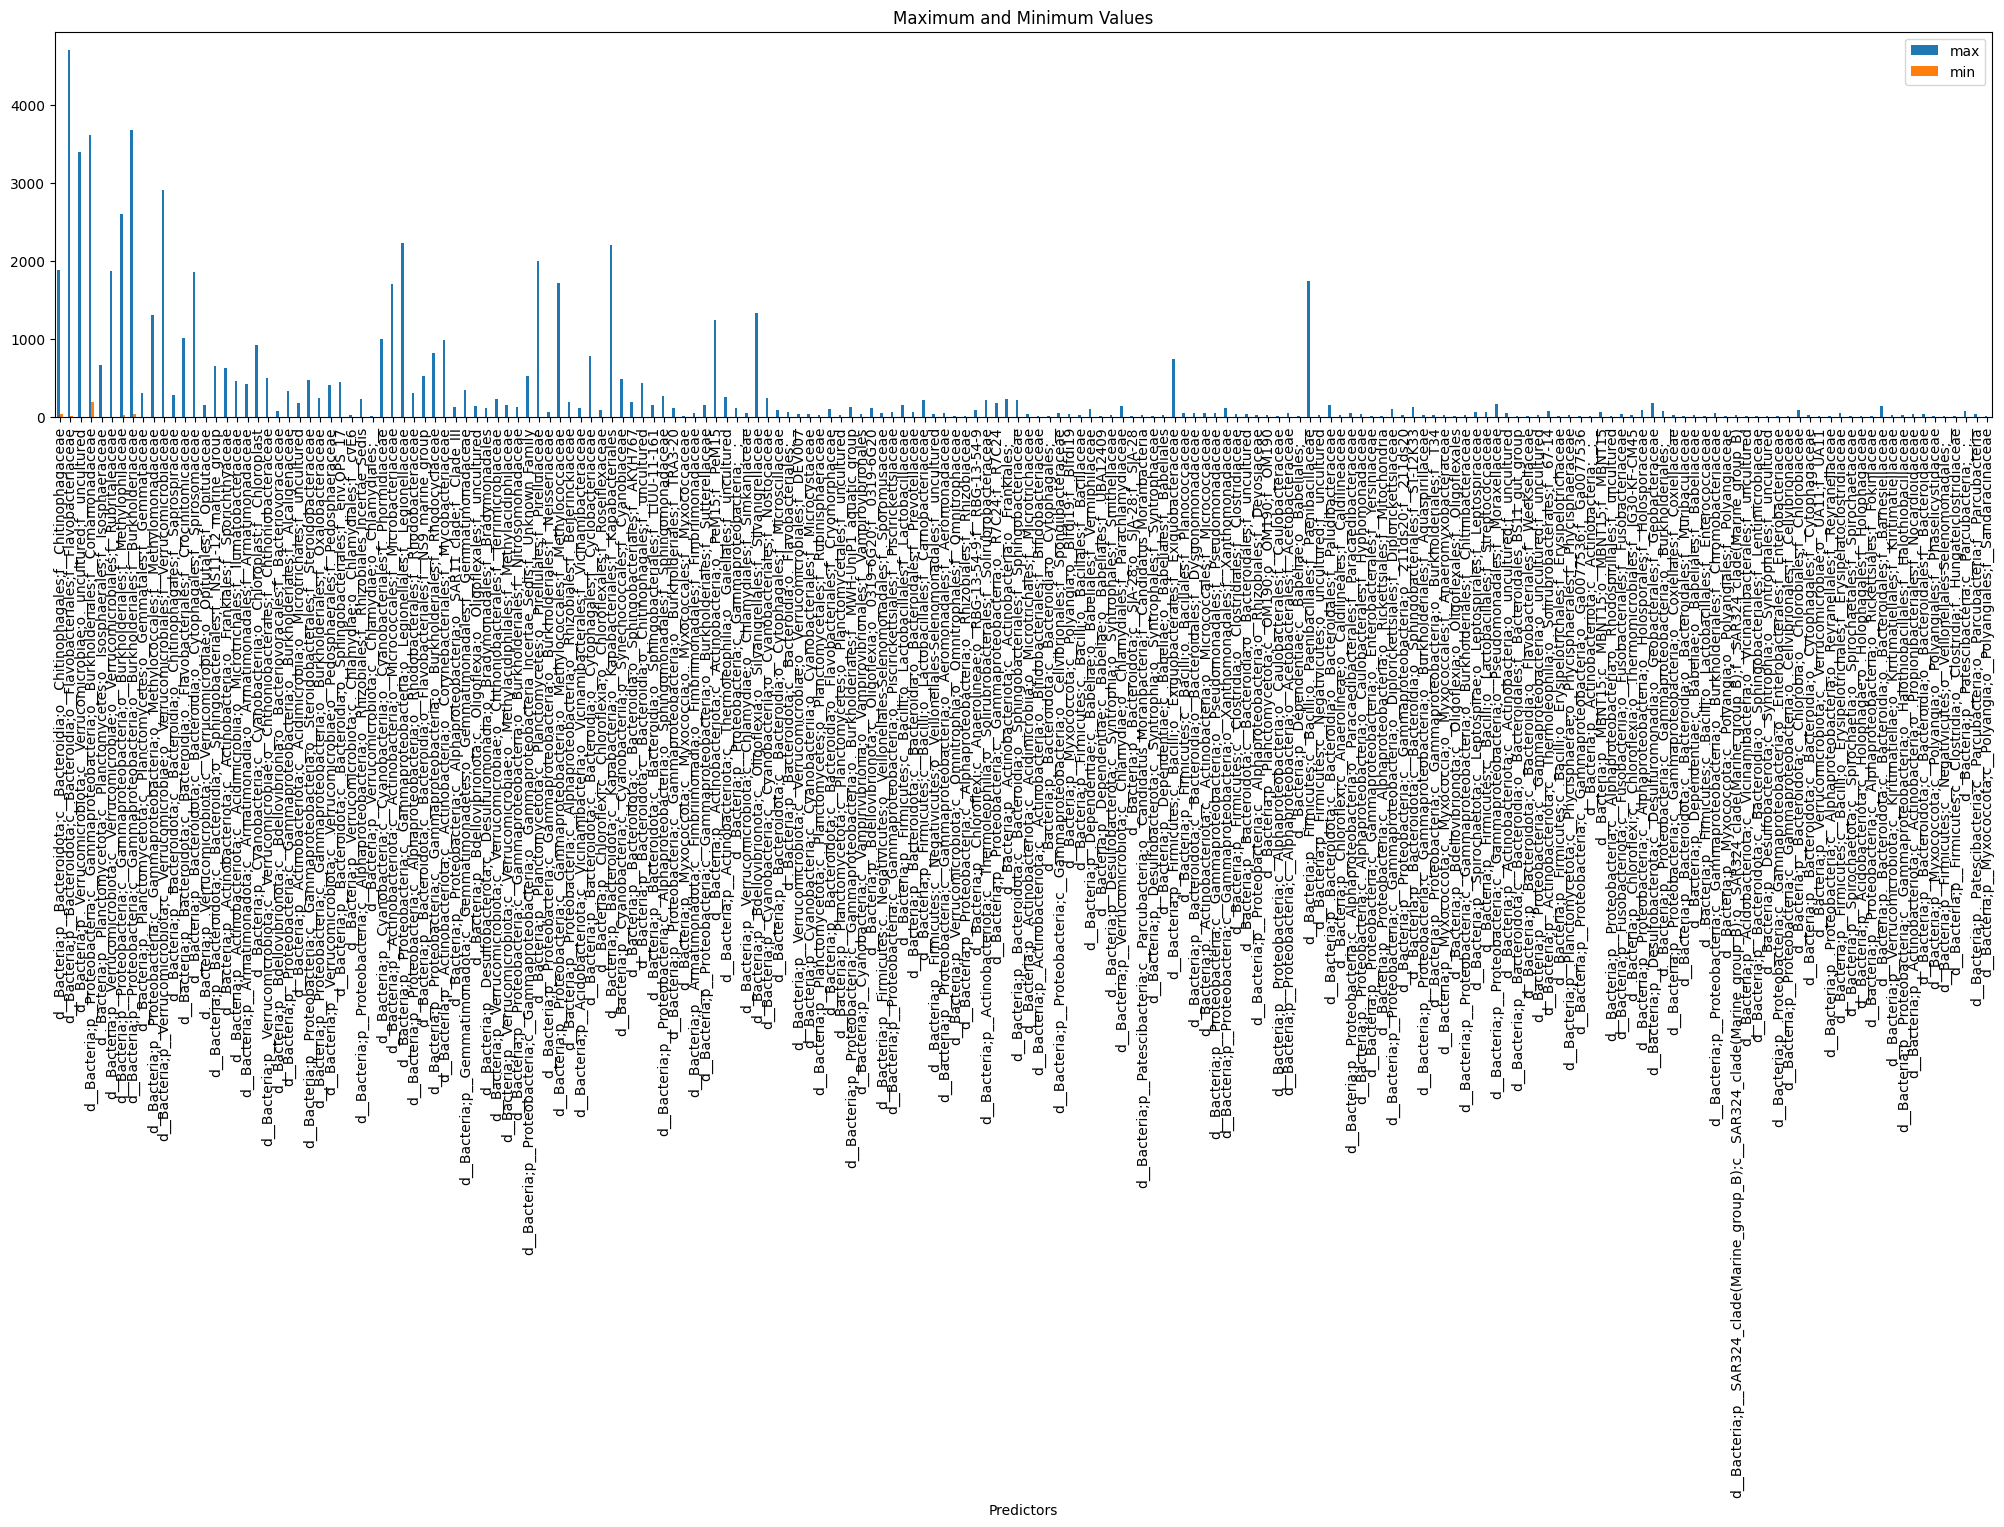

In [9]:
max_values = df[predictors].max()
min_values = df[predictors].min()


max_min_df = pd.DataFrame({'max': max_values, 'min': min_values})
max_min_df.plot(kind='bar', figsize=(25, 5))
plt.title('Maximum and Minimum Values')
plt.xlabel('Predictors')
plt.show()

Distribution of maximum and minimum values for each predictor also varies a lot so we will normalise them by column using standard min max scaling.

In [ ]:
df[predictors] = df[predictors].fillna(0)

In [7]:
def clr_manual(matrix):
    """Applies Centered Log-Ratio (CLR) transformation"""
    matrix = matrix + 1
    matrix = np.array(matrix)
    geometric_mean = np.exp(np.mean(np.log(matrix), axis=1))[:, np.newaxis] 
    clr_transformed = np.log(matrix / geometric_mean) 
    return clr_transformed
df[predictors] = pd.DataFrame(clr_manual(df[predictors]),columns = df[predictors].columns)

In [18]:
df[predictors] = clr_manual(df[predictors])

In [ ]:
#df.to_csv('H2O_bacteria_clr.csv', index=False)

In [ ]:
#df[predictors] = normalize(df[predictors],norm = 'max', axis=0)

In [11]:
df.describe()

sample_id  timepoint  \
count   73.000000  73.000000   
mean   163.767123   1.027397   
std     21.577072   0.816030   
min    126.000000   0.000000   
25%    146.000000   0.000000   
50%    164.000000   1.000000   
75%    182.000000   2.000000   
max    200.000000   2.000000   

       d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae  \
count                                          73.000000                                   
mean                                            0.313476                                   
std                                             0.225801                                   
min                                             0.021867                                   
25%                                             0.115200                                   
50%                                             0.266133                                   
75%                                             0.437333                                   
max                                             1.000000                                   

       d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae  \
count                                          73.000000                                     
mean                                            0.135342                                     
std                                             0.184046                                     
min                                             0.001490                                     
25%                                             0.043413                                     
50%                                             0.069589                                     
75%                                             0.157693                                     
max                                             1.000000                                     

       d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured  \
count                                          73.000000                                  
mean                                            0.126764                                  
std                                             0.200156                                  
min                                             0.000000                                  
25%                                             0.018862                                  
50%                                             0.057471                                  
75%                                             0.119953                                  
max                                             1.000000                                  

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae  \
count                                          73.000000                                           
mean                                            0.340314                                           
std                                             0.221180                                           
min                                             0.052092                                           
25%                                             0.193128                                           
50%                                             0.294819                                           
75%                                             0.393461                                           
max                                             1.000000                                           

       d__Bacteria;p__Planctomycetota;c__Planctomycetes;o__Isosphaerales;f__Isosphaeraceae  \
count                                          73.000000                                     
mean                                            0.172090                                     
std                                     

Next we will decode our pond column to obtain classes

Explanation of pond coding

| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [12]:
def pond_decoder(x,codes):
   
    x=x.replace('S','')
    num = int(x)
    for key, value_list in codes.items():
        if num in value_list:
            return key
    
    return None   

codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}

df['class_pond'] = df['pond'].apply(lambda x: pond_decoder(x,codes))


C:\Users\marek\AppData\Local\Temp\ipykernel_13032\3647536681.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['class_pond'] = df['pond'].apply(lambda x: pond_decoder(x,codes))


In [13]:
df = df.copy()

In [14]:
df.head()

pond  sample_id               ID  timepoint  \
0   S8        126    S8.126.H2O.S8          0   
1   S8        127    S8.127.H2O.S8          1   
2   S8        128    S8.128.H2O.S8          2   
3  S14        129  S14.129.H2O.S14          0   
4  S14        130  S14.130.H2O.S14          1   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae  \
0                                           0.275733                                   
1                                           0.284800                                   
2                                           0.106667                                   
3                                           0.366933                                   
4                                           0.255467                                   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae  \
0                                           0.018089                                     
1                                           0.067674                                     
2                                           0.037242                                     
3                                           0.002767                                     
4                                           0.044265                                     

   d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured  \
0                                           0.165930                                  
1                                           0.124668                                  
2                                           0.007073                                  
3                                           0.049514                                  
4                                           0.065429                                  

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae  \
0                                           0.285398                                           
1                                           0.216958                                           
2                                           0.200887                                           
3                                           0.469936                                           
4                                           0.209199                                           

   d__Bacteria;p__Planctomycetota;c__Planctomycetes;o__Isosphaerales;f__Isosphaeraceae  \
0                                           0.000000                                     
1                                           0.000000                                     
2                                           0.015083                                     
3                                           0.003017                                     
4                                           0.012066                                     

   d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Rubritaleaceae  \
0                                           0.000000                                              
1                                           0.000000                                              
2                                           0.117300                                              
3                                           0.000000                                              
4                                           0.001607                                              

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Halothiobacillales;f__Halothiobacillaceae  \
0                                                0.0                                                   
1                                                0.0                                                   
2                           

With now dataset ready for analysis we will try to build, train and evaluate models 

### Modeling timepoints only

#### Model building


In [15]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=111, stratify=df['timepoint'])

In [18]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))
model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(64, activation ='relu'))
model1.add(keras.layers.Dropout(rate=0.25))
#model1.add(keras.layers.Dense(16, activation ='relu'))
model1.add(keras.layers.Dense(3, activation ='softmax'))
loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9167 - loss: 0.3096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [0 1 2 1 1 1 2 1 1 1 0 2]
true validation classes: [0 1 2 1 1 1 2 1 1 1 2 2]
mean confidence score: 438101.9561, sd confidence score: 1198130.5753
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0359
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted classes:       [2 0 1 2 2 1 0 0 2 0 0 0]
true validation classes: [2 0 1 2 2 1 0 0 2 0 0 0]
mean confidence score: 1555420.768, sd confidence score: 4847468.3085
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9167 - loss: 0.3354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [1 2 2 2 1 1 2 1 0 0 1 2]
true validation classes: [1 1 2 2 1 1 2 1 0 0 1 2]
mean confidence score: 3909.1009, sd confidence score: 9365.3551
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 

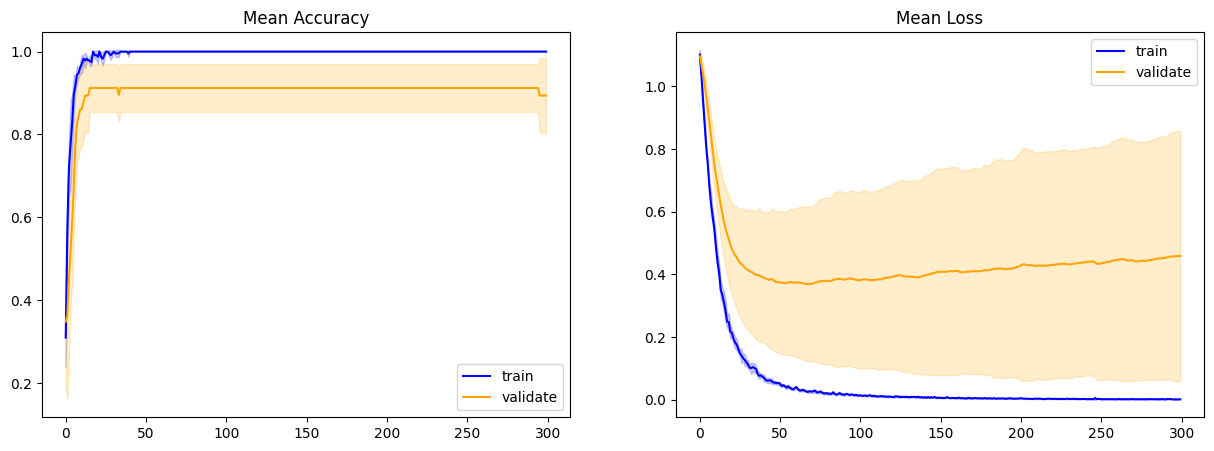

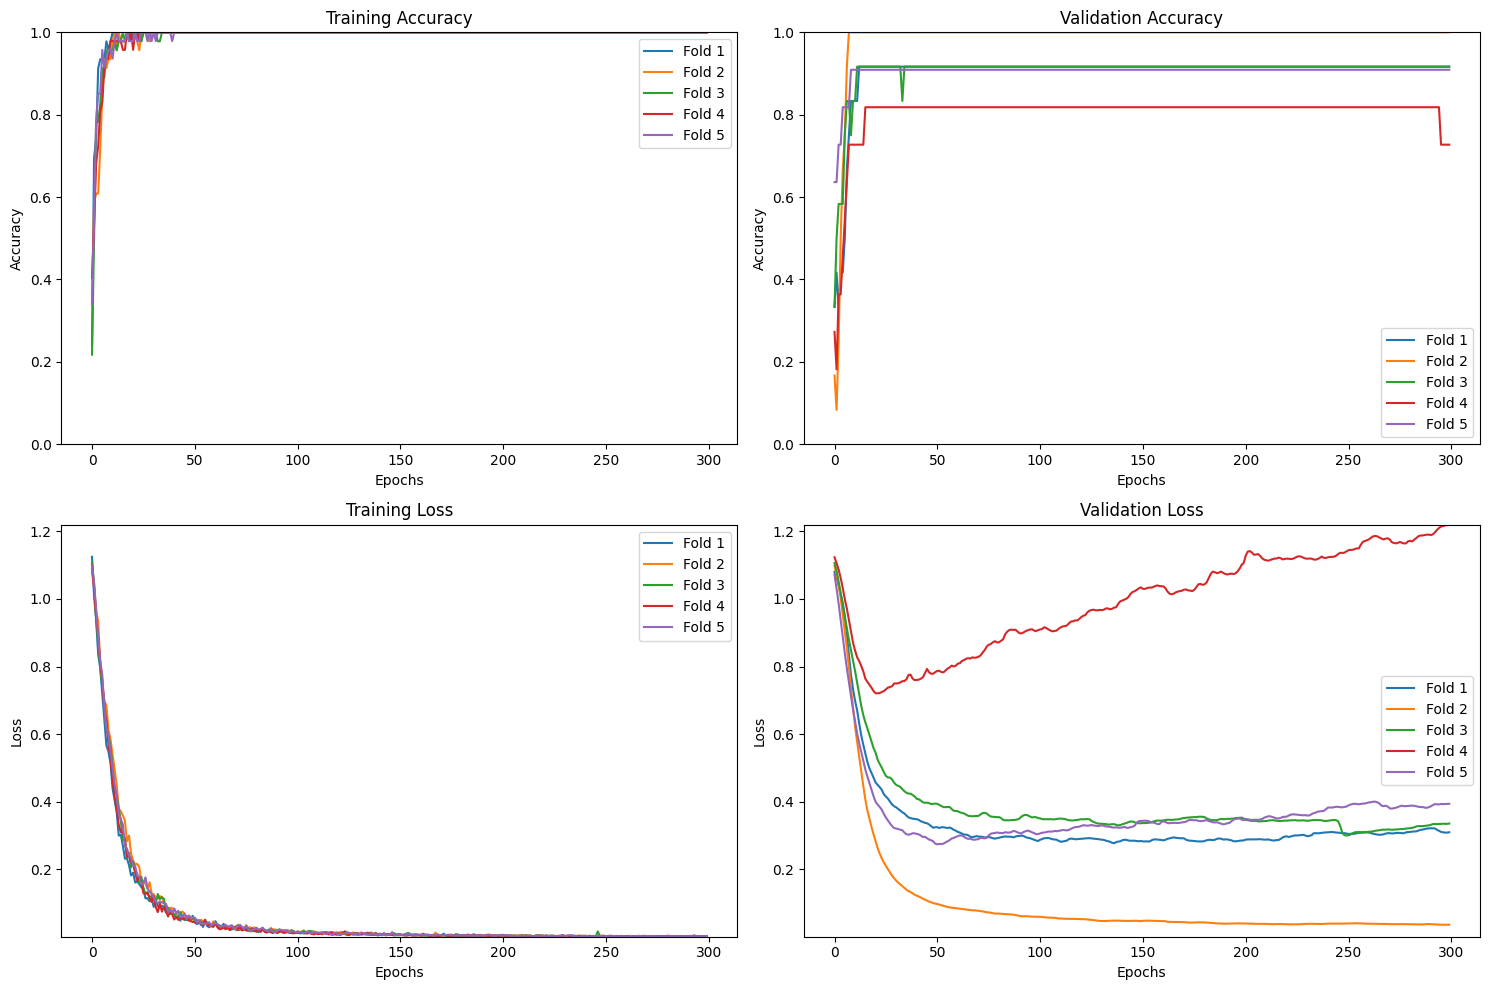

In [21]:
crossvalidate(train_val_df, model1, predictors, "timepoint", kf)

In [31]:
reset_weights(model1)
history = model1.fit(train_val_df[predictors], to_categorical(train_val_df['timepoint']),validation_split=0.2, epochs= 300, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0554
[0.05544615536928177, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted values: [2 0 1 2 1 2 0 0 2 1 1 0 2 0 1]
True values: [2 0 1 2 1 2 0 0 2 1 1 0 2 0 1]


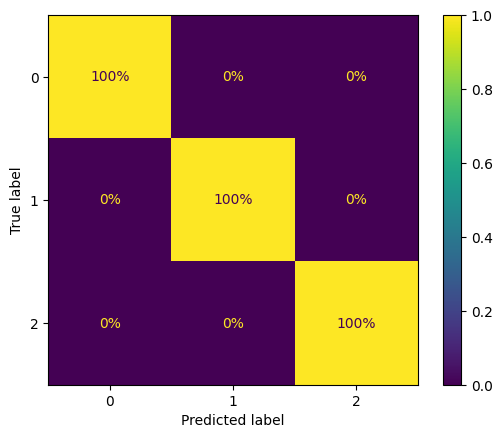

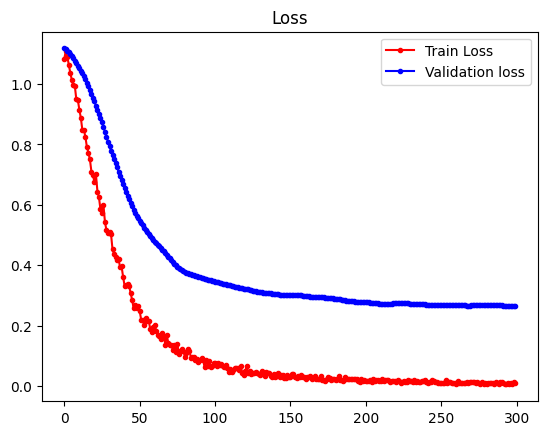

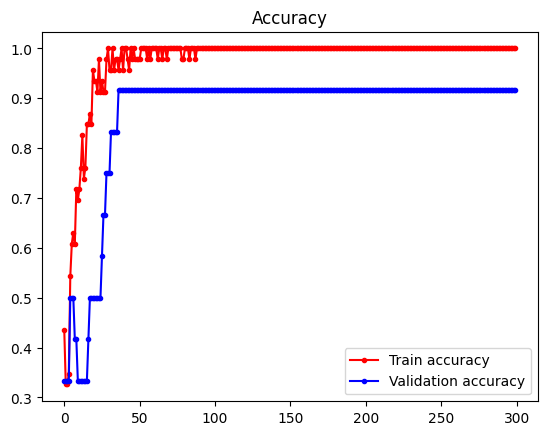

In [32]:
evaluate_model(model1,history,test_df[predictors], keras.utils.to_categorical(test_df['timepoint']))

As for previous approaches we can note that the differences between timepoints can be clearly defined by the model as its results for validation datasets are very good despite having now 3 timepoints, and testing on previously unseen by model test set.

We will now try to classify based only on different experimental setups. 

### Modeling differences between Classes for both timepoints at the same time

In [33]:
model2 = keras.Sequential()



model2.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))


#model2.add(keras.layers.Dropout(rate=0.25))
model2.add(keras.layers.Dense(64, activation ='relu'))
#model2.add(keras.layers.Dropout(rate=0.25))
model2.add(keras.layers.Dense(16, activation ='relu'))

model2.add(keras.layers.Dense(5, activation ='softmax'))

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model2.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2000 - loss: 3.0158
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
predicted classes:       [2 3 3 3 0 0 1 4 2 3 4 3 0 1 1]
true validation classes: [0 1 1 1 1 1 2 2 2 3 3 3 4 4 4]
mean confidence score: 50.5046, sd confidence score: 92.0178
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2667 - loss: 4.9844
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [1 0 4 1 2 1 3 3 2 2 2 2 2 2 0]
true validation classes: [0 0 0 1 1 2 3 3 3 3 4 4 4 4 3]
mean confidence score: 1406.7667, sd confidence score: 2768.3182
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2667 - loss: 3.6472
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [1 3 3 4 1 0 1 0 1 1 4 4 2 4 3]
true validation classes: [0 0 1 1 2 2 2 2 3 3 4 4 4 4 3]
mean confidence score: 238.6859, sd confidence score: 635.1132
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

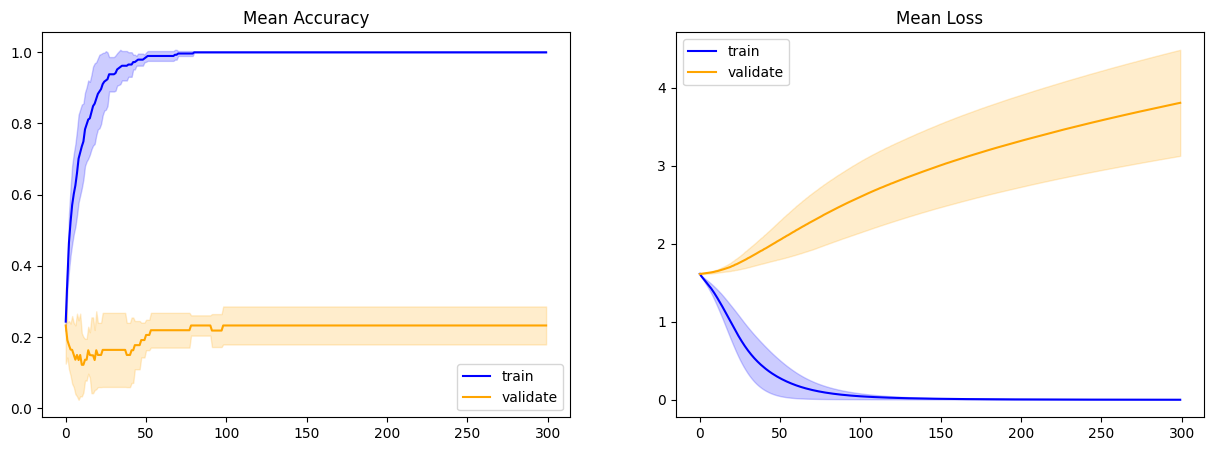

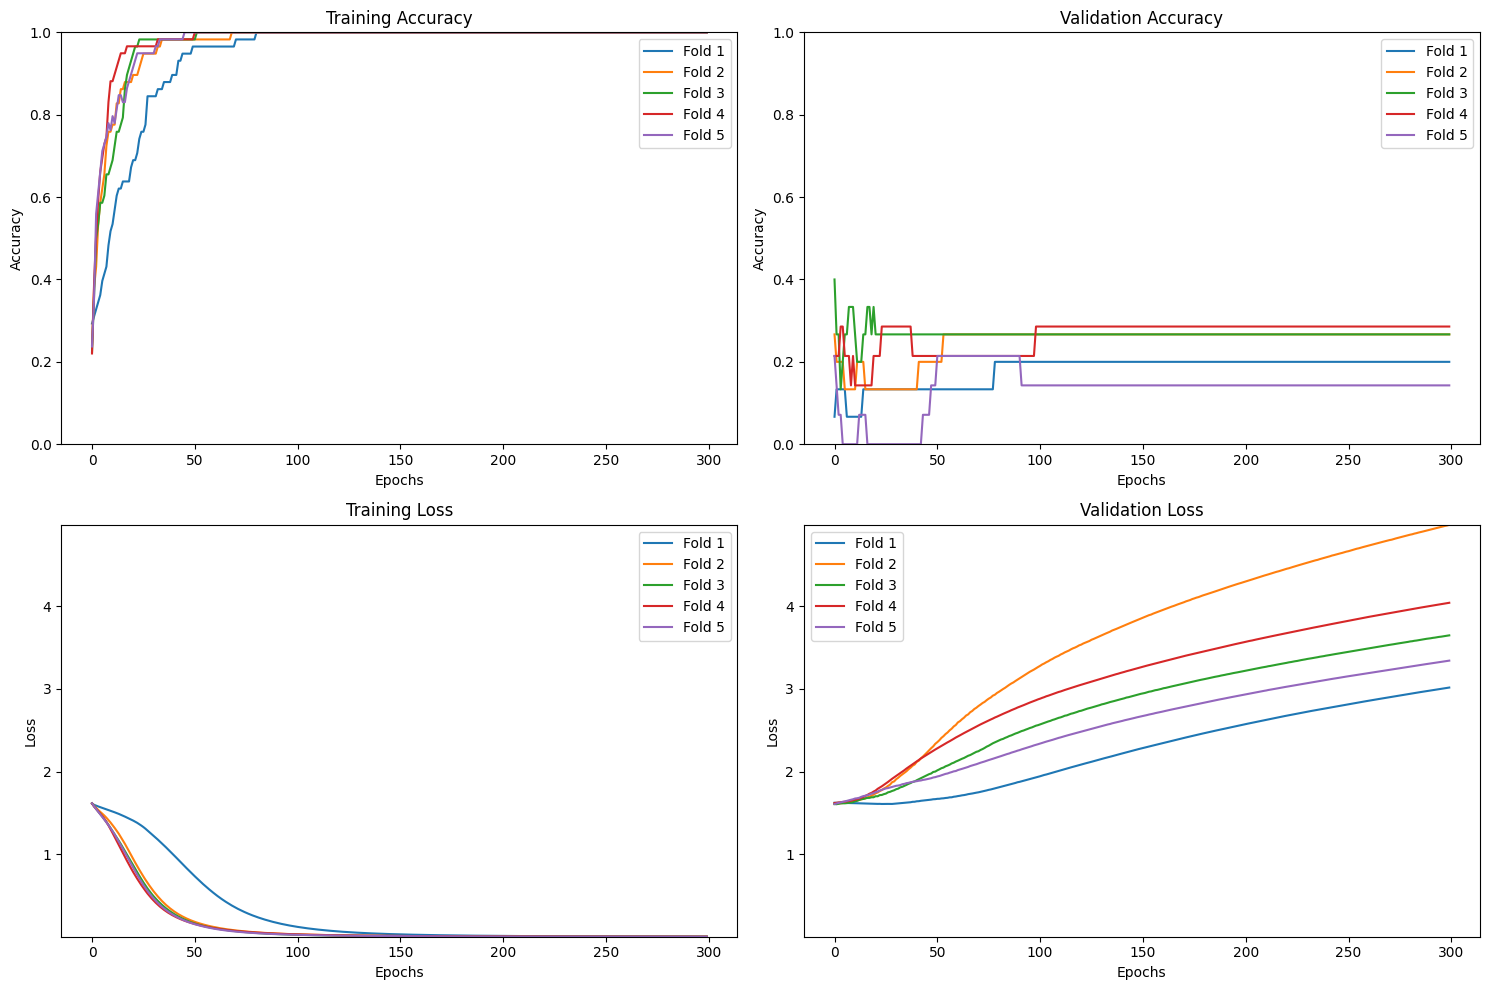

In [34]:
crossvalidate(df, model2, predictors, "class_pond", kf)

We can note similarly bad results as for different datasets, the reason for that is probably that we do not account for differences between timepoints, we will try to classify ponds in different timepoints now.


### Modeling class differences in first timepoint

In [45]:
df_first_tp = df[df["timepoint"]==0]
print(df_first_tp.shape)
df_first_tp.head()

(23, 193)


pond  sample_id               ID  timepoint  \
0    S8        126    S8.126.H2O.S8          0   
3   S14        129  S14.129.H2O.S14          0   
8   S24        135  S24.135.H2O.S24          0   
13  S12        141  S12.141.H2O.S12          0   
16  S16        144  S16.144.H2O.S16          0   

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae  \
0                                            0.275733                                   
3                                            0.366933                                   
8                                            0.441600                                   
13                                           0.158400                                   
16                                           1.000000                                   

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae  \
0                                            0.018089                                     
3                                            0.002767                                     
8                                            0.712279                                     
13                                           0.001490                                     
16                                           0.068951                                     

    d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured  \
0                                            0.165930                                  
3                                            0.049514                                  
8                                            0.491306                                  
13                                           0.081049                                  
16                                           0.081639                                  

    d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae  \
0                                            0.285398                                           
3                                            0.469936                                           
8                                            0.341369                                           
13                                           0.137434                                           
16                                           0.962316                                           

    d__Bacteria;p__Planctomycetota;c__Planctomycetes;o__Isosphaerales;f__Isosphaeraceae  \
0                                            0.000000                                     
3                                            0.003017                                     
8                                            1.000000                                     
13                                           0.024133                                     
16                                           0.007541                                     

    d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Rubritaleaceae  \
0                                            0.000000                                              
3                                            0.000000                                              
8                                            0.083557                                              
13                                           0.000000                                              
16                                           0.183182                                              

    ...  \
0   ...   
3   ...   
8   ...   
13  ...   
16  ...   

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae  \
0                                                 0.0                               
3                                                 0.0                               
8                                     

In [36]:
model3 = keras.Sequential()



model3.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))


model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(64, activation ='relu'))
model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(16, activation ='relu'))

model3.add(keras.layers.Dense(5, activation ='softmax'))

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model3.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.0000e+00 - loss: 2.9276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
predicted classes:       [3 2 0 0 4]
true validation classes: [1 1 2 3 3]
mean confidence score: 7.9873, sd confidence score: 5.6083
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 3.0651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [1 4 0 2 2]
true validation classes: [0 1 1 3 4]
mean confidence score: 23.6411, sd confidence score: 34.9904
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2000 - loss: 1.4367
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [3 2 2 3 2]
true validation classes: [0 2 3 4 4]
mean confidence score: 4.7671, sd confidence score: 3.7758
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 2.9213
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
predicted classes:       [3 2 1 4]
tr

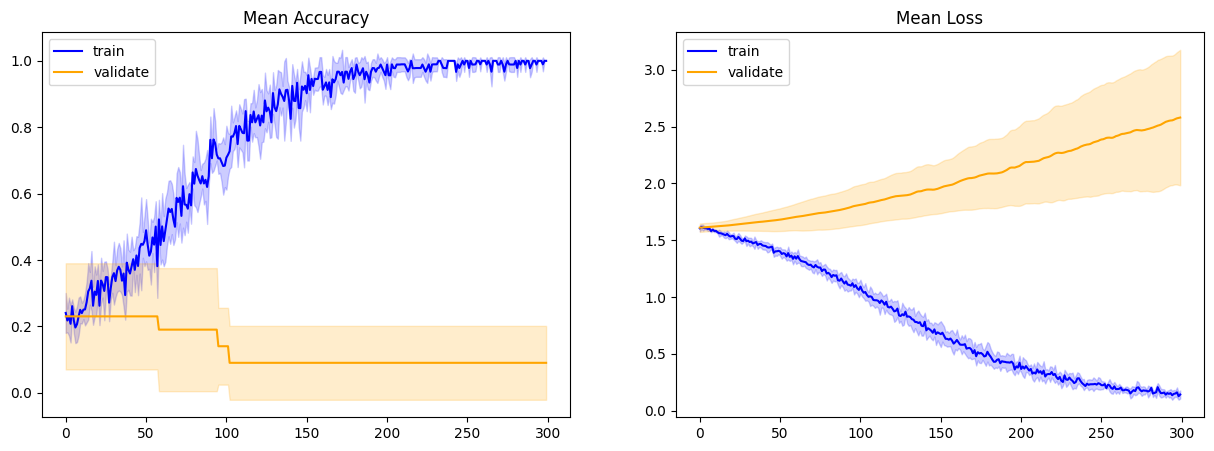

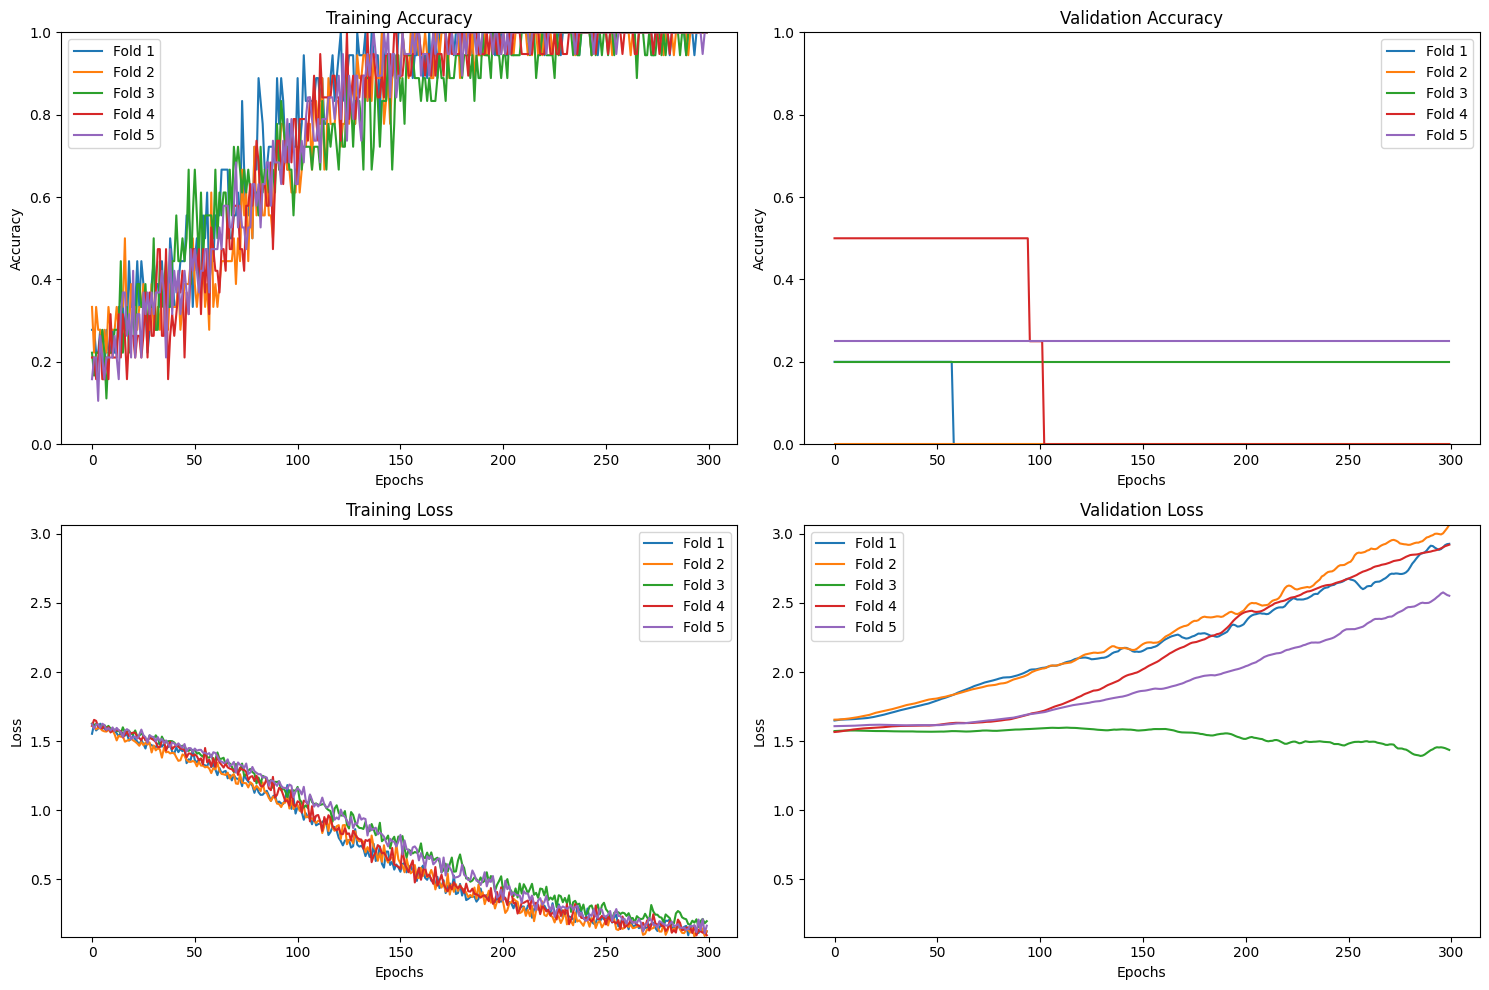

In [37]:
crossvalidate(df_first_tp, model3, predictors, "class_pond", kf)

### Modeling class differences in second timepoint

In [44]:
df_second_tp = df[df["timepoint"]==1]
print(df_second_tp.shape)
df_second_tp.head()

(25, 193)


pond  sample_id               ID  timepoint  \
1    S8        127    S8.127.H2O.S8          1   
4   S14        130  S14.130.H2O.S14          1   
6   S18        133  S18.133.H2O.S18          1   
9   S24        136  S24.136.H2O.S24          1   
11  S29        139  S29.139.H2O.S29          1   

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae  \
1                                            0.284800                                   
4                                            0.255467                                   
6                                            0.200000                                   
9                                            0.196800                                   
11                                           0.098133                                   

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae  \
1                                            0.067674                                     
4                                            0.044265                                     
6                                            0.005320                                     
9                                            0.087891                                     
11                                           0.057459                                     

    d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured  \
1                                            0.124668                                  
4                                            0.065429                                  
6                                            0.011494                                  
9                                            0.022399                                  
11                                           0.041556                                  

    d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae  \
1                                            0.216958                                           
4                                            0.209199                                           
6                                            0.213910                                           
9                                            0.159878                                           
11                                           0.321142                                           

    d__Bacteria;p__Planctomycetota;c__Planctomycetes;o__Isosphaerales;f__Isosphaeraceae  \
1                                            0.000000                                     
4                                            0.012066                                     
6                                            0.058824                                     
9                                            0.079940                                     
11                                           0.095023                                     

    d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Rubritaleaceae  \
1                                            0.000000                                              
4                                            0.001607                                              
6                                            0.000000                                              
9                                            0.000000                                              
11                                           0.000000                                              

    ...  \
1   ...   
4   ...   
6   ...   
9   ...   
11  ...   

    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae  \
1                                                 0.0                               
4                                                 0.0                               
6                                     

In [39]:
model3 = keras.Sequential()



model3.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))


model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(64, activation ='relu'))
model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(16, activation ='relu'))

model3.add(keras.layers.Dense(5, activation ='softmax'))

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model3.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.2000 - loss: 2.1015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
predicted classes:       [4 3 4 4 3]
true validation classes: [0 0 2 2 3]
mean confidence score: 8.1486, sd confidence score: 6.9876
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 3.0145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [2 2 0 2 2]
true validation classes: [1 1 2 3 3]
mean confidence score: 3.337, sd confidence score: 2.6863
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2000 - loss: 2.6005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [0 1 4 1 2]
true validation classes: [0 0 2 3 4]
mean confidence score: 5.944, sd confidence score: 3.8215
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2000 - loss: 2.8138
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [2 3 0 0 4]
true validat

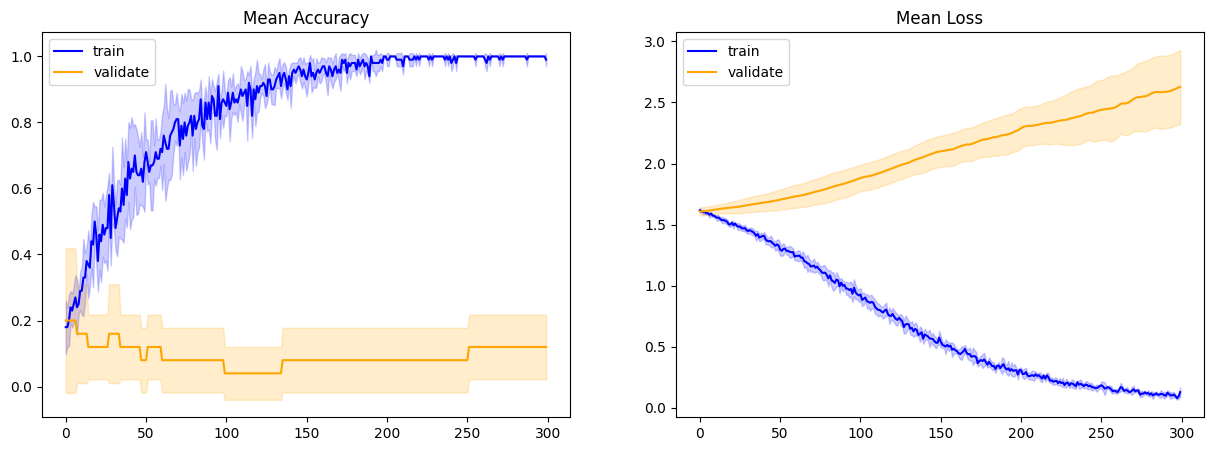

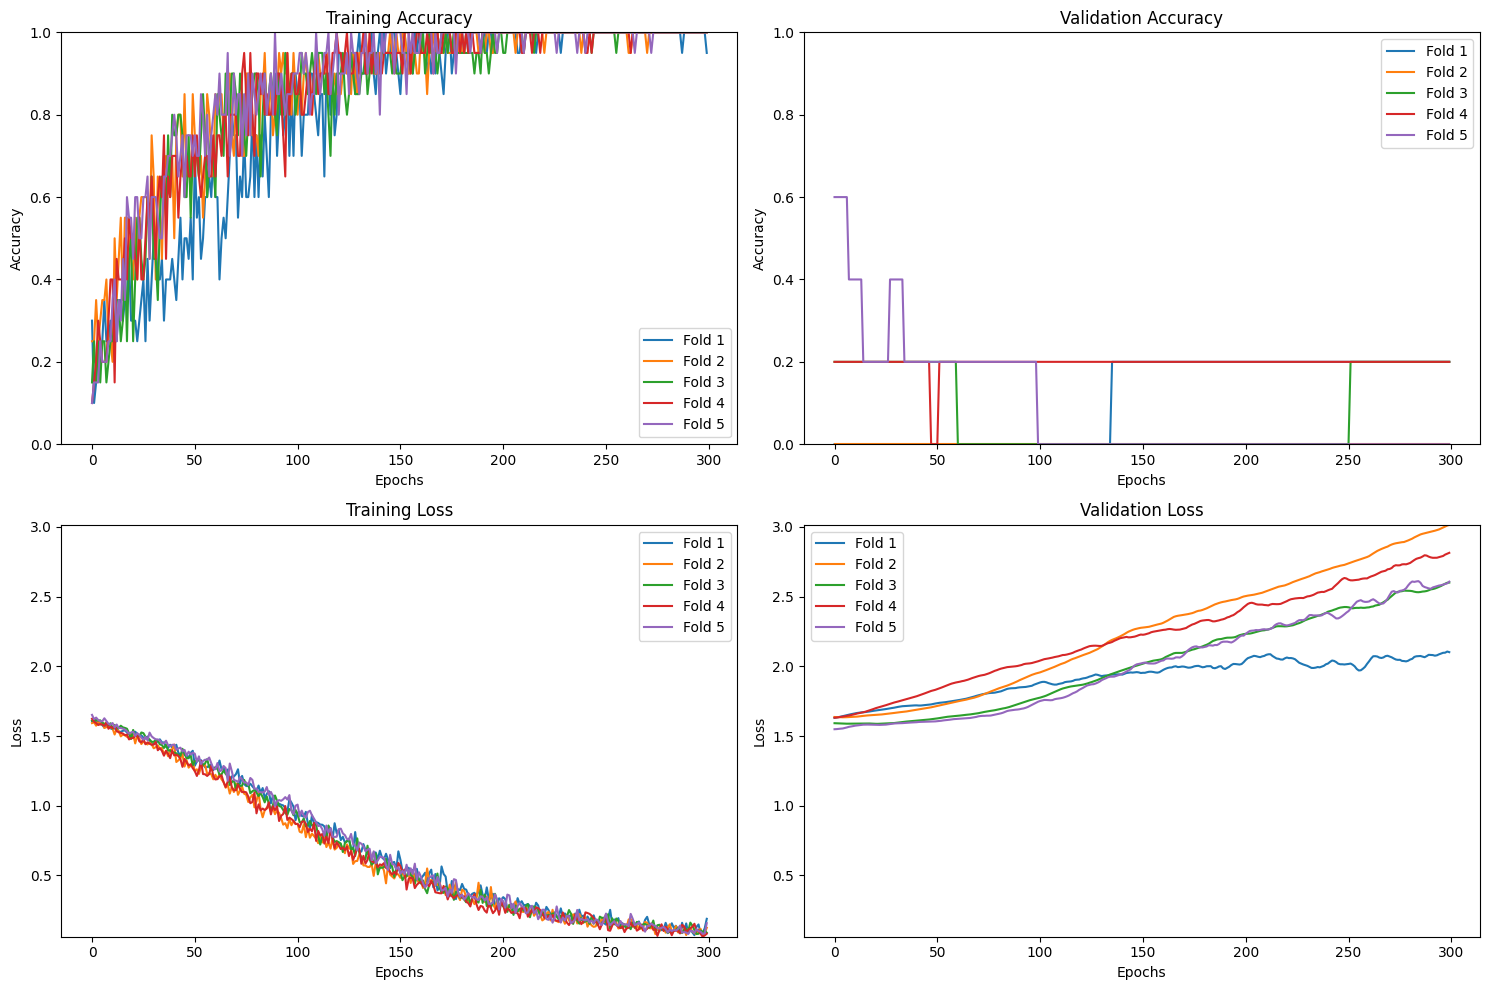

In [40]:
crossvalidate(df_second_tp, model3, predictors, "class_pond", kf)

#### Modeling in third timepoint

In [43]:
df_third_tp = df[df["timepoint"]==2]


In [44]:
model3_2 = keras.Sequential()
model3_2.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))
model3_2.add(keras.layers.Dropout(rate=0.25))
model3_2.add(keras.layers.Dense(64, activation ='relu'))
model3_2.add(keras.layers.Dropout(rate=0.25))
model3_2.add(keras.layers.Dense(16, activation ='relu'))
model3_2.add(keras.layers.Dense(5, activation ='softmax'))

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model3_2.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.2000 - loss: 2.3015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
predicted classes:       [4 1 4 4 3]
true validation classes: [0 0 2 2 3]
mean confidence score: 8.6451, sd confidence score: 5.1129
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 3.0349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [4 0 0 4 4]
true validation classes: [1 1 2 3 3]
mean confidence score: 6.2896, sd confidence score: 4.6589
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4000 - loss: 3.0661
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted classes:       [0 1 1 3 1]
true validation classes: [0 0 2 3 4]
mean confidence score: 7.5418, sd confidence score: 5.8966
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 2.4774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [3 4 3 2 3]
true v

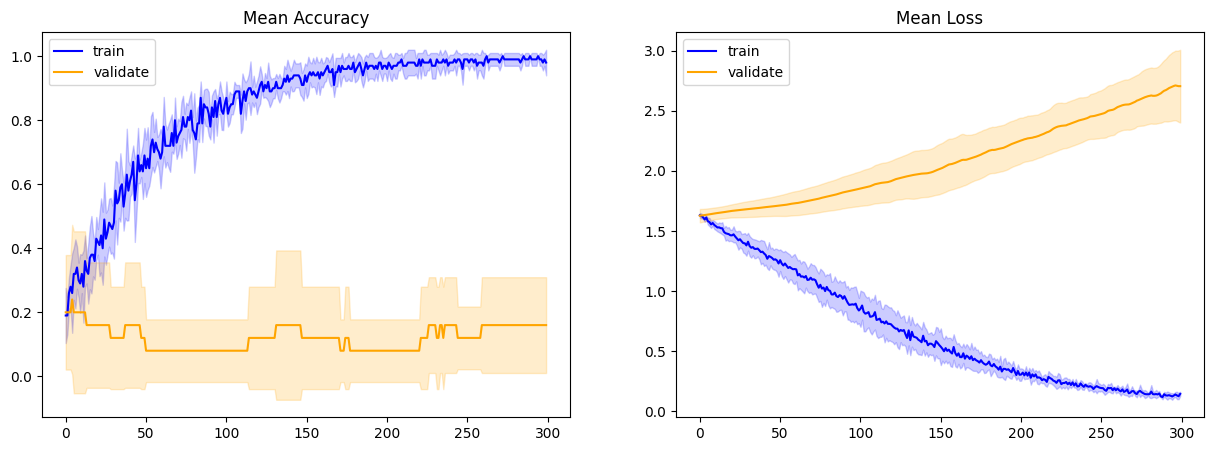

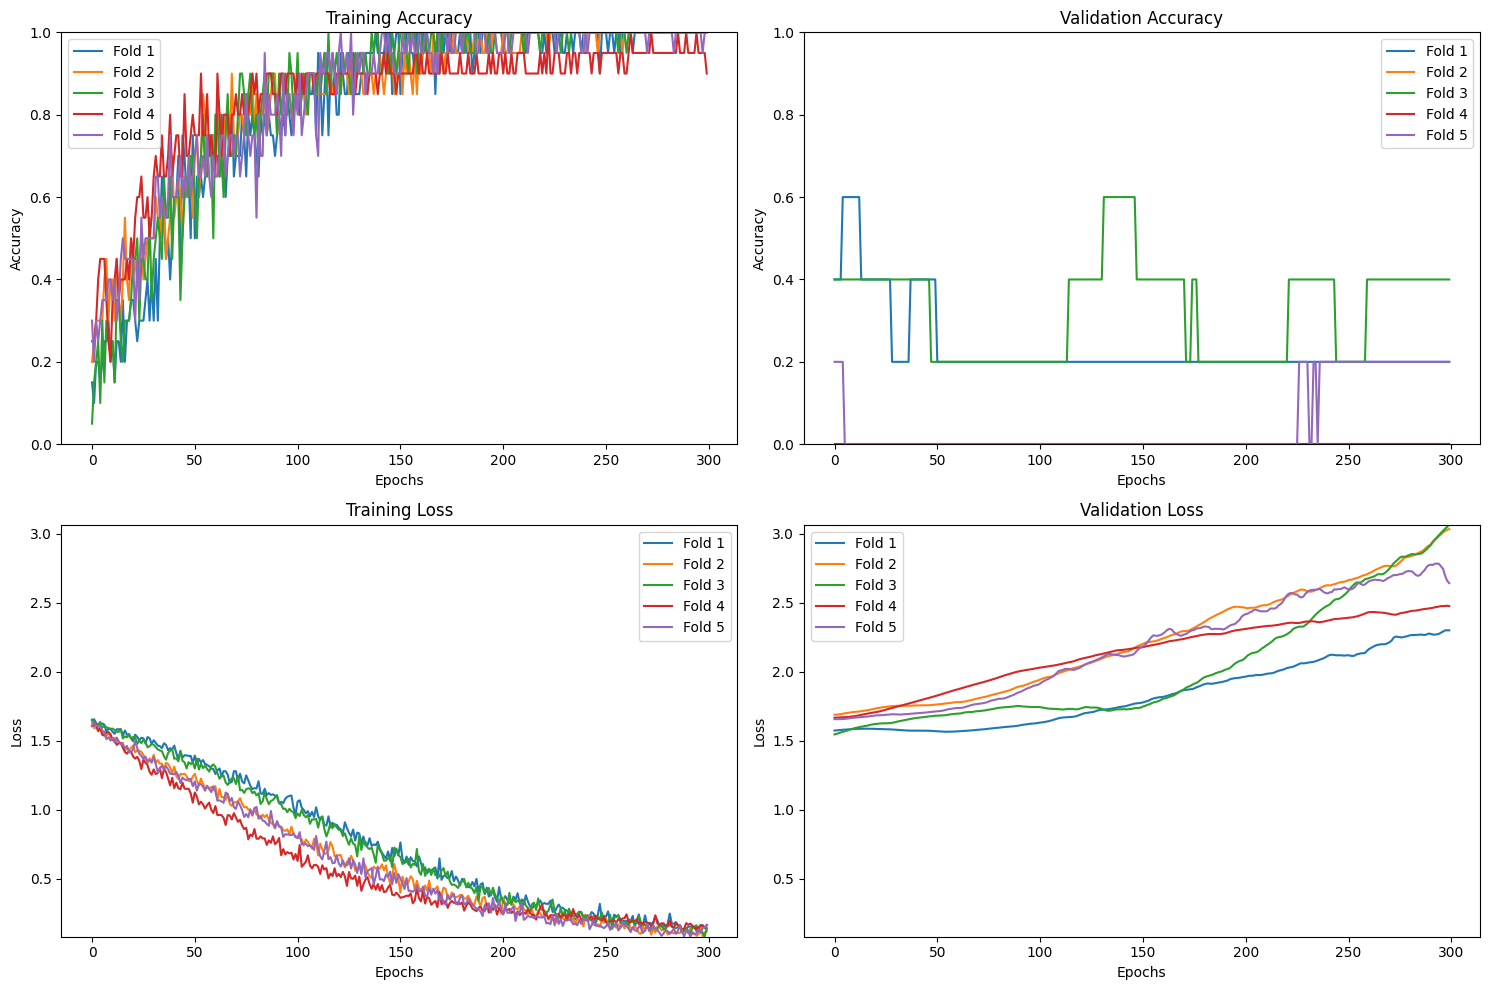

In [45]:
crossvalidate(df_third_tp, model3_2, predictors, "class_pond", kf)

Results for modeling ponds in different setups
We would expect best results in second timepoint as it is probably the timepoint that the differenecs done by supplementation can be seen the most. The case howerer is that for all the timepoints results are bad, main reson once again will be low number of samples (25 per timepoint), we can see that its hard to grasp so complicated by simple model, and we cannot build more complciated one as we already have problems with overfitting. the reason can also be that there is not enough differences in between ponds. 

### Modeling for Experimental setup and timepoint

In [ ]:
df["class_timepointXpond"] = df["timepoint"].astype(str) + "_" + df["class_pond"].astype(str)
df["class_timepointXpond_encoded"] = LabelEncoder().fit_transform(df["class_timepointXpond"])
df["class_timepointXpond_encoded"] = df["class_timepointXpond_encoded"].astype(int)

In [50]:
model4 = keras.Sequential()



model4.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))


model4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Dense(64, activation ='relu'))
model4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Dense(16, activation ='relu'))

model4.add(keras.layers.Dense(15, activation ='softmax'))

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model4.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of classes: 15
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2000 - loss: 3.0018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
predicted classes:       [10 11 13  8  5  5  1  9 14 10  2 13  0  9 10]
true validation classes: [10 11 11  6  6  6 12  7 12  8  3  8  4  9 14]
mean confidence score: 64.9438, sd confidence score: 108.8113
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1333 - loss: 4.2470
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [ 1  1  3  4  2 11 13  3  2  7  2  7  2  2  5]
true validation classes: [ 0  5  0  1  1 12 13  3  3  8  4  9  4  4  8]
mean confidence score: 127.8979, sd confidence score: 190.8794
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2000 - loss: 3.5522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [ 7 13  7 11  6 11  5 13  1 11  1  4 11 12 13]
true validation classes: [ 5  5  6 11  7 12  7 12  8 13  9  4 14  9 13]
mean confidence score: 2

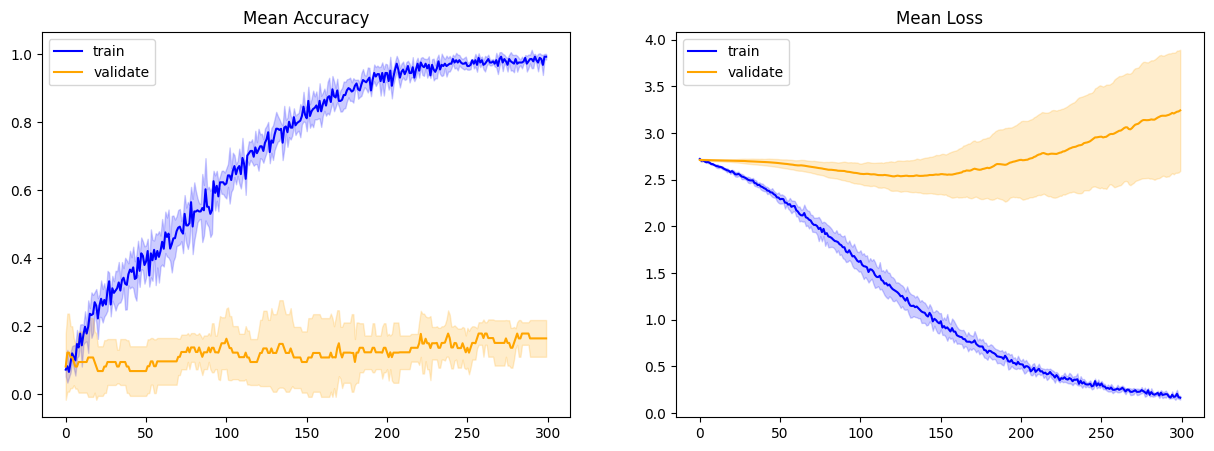

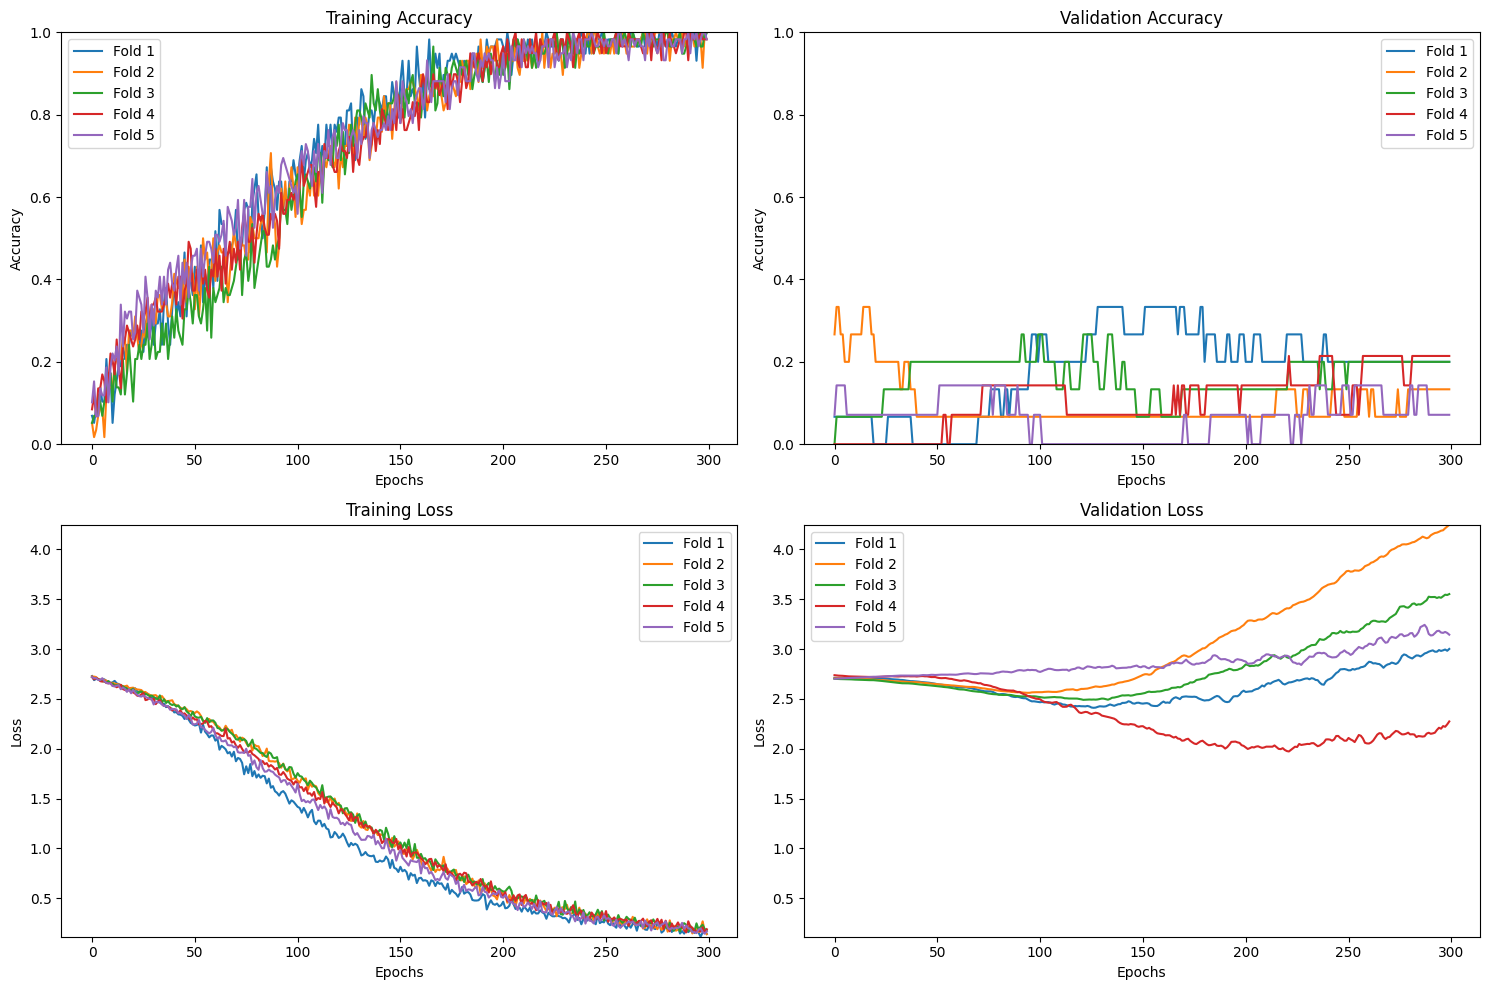

In [51]:
crossvalidate(df, model4, predictors, "class_timepointXpond_encoded", kf)

Issue here is that we didntimprove class to samples ratio so and we have even more complicated dependencies that'd require more complex model that we cannot really build with this dataset.

# Changing classes
We will now perfom same thing that helped for Gut classification but unfortunetely didnt improve for sediment at all, which is to redefine classes based on enviromental supplementation.  

In [53]:
codes3 = {0 : [8,14,18,24,29], 1: [12,16,19,23,26, 10,21,28,30,32], 2 : [9,13,17,20,27,11,15,22,25,31]}
df['class_pond'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))

## modeling ponds for all timepoints

In [56]:
model5 = keras.Sequential()
model5.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))
#model5.add(keras.layers.Dropout(rate=0.25))
model5.add(keras.layers.Dense(64, activation ='relu'))
#model5.add(keras.layers.Dropout(rate=0.25))
model5.add(keras.layers.Dense(16, activation ='relu'))
model5.add(keras.layers.Dense(3, activation ='softmax'))

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model5.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3333 - loss: 2.2435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [2 2 0 2 0 0 1 2 2 2 2 2 0 1 2]
true validation classes: [0 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
mean confidence score: 92.3114, sd confidence score: 201.9104
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2667 - loss: 4.4687
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted classes:       [1 1 2 1 1 1 2 1 1 1 1 1 1 1 0]
true validation classes: [0 0 0 1 1 1 2 2 2 2 2 2 2 2 2]
mean confidence score: 23089.832, sd confidence score: 56085.2419
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4000 - loss: 1.9574
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
predicted classes:       [1 2 2 2 2 0 1 1 1 2 2 2 1 1 2]
true validation classes: [0 0 1 1 1 1 1 1 2 2 2 2 2 2 2]
mean confidence score: 3651.0994, sd confidence score: 11162.5675
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 

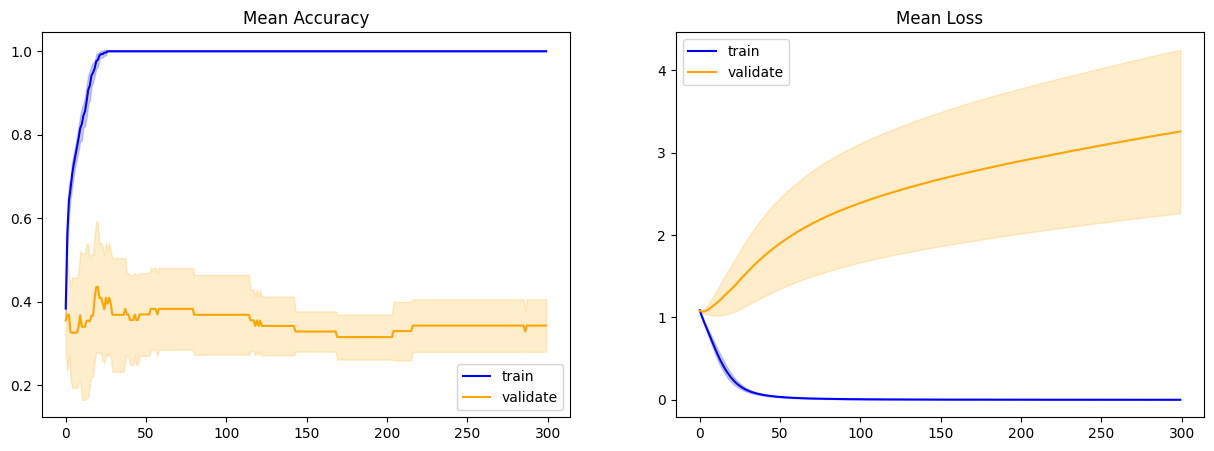

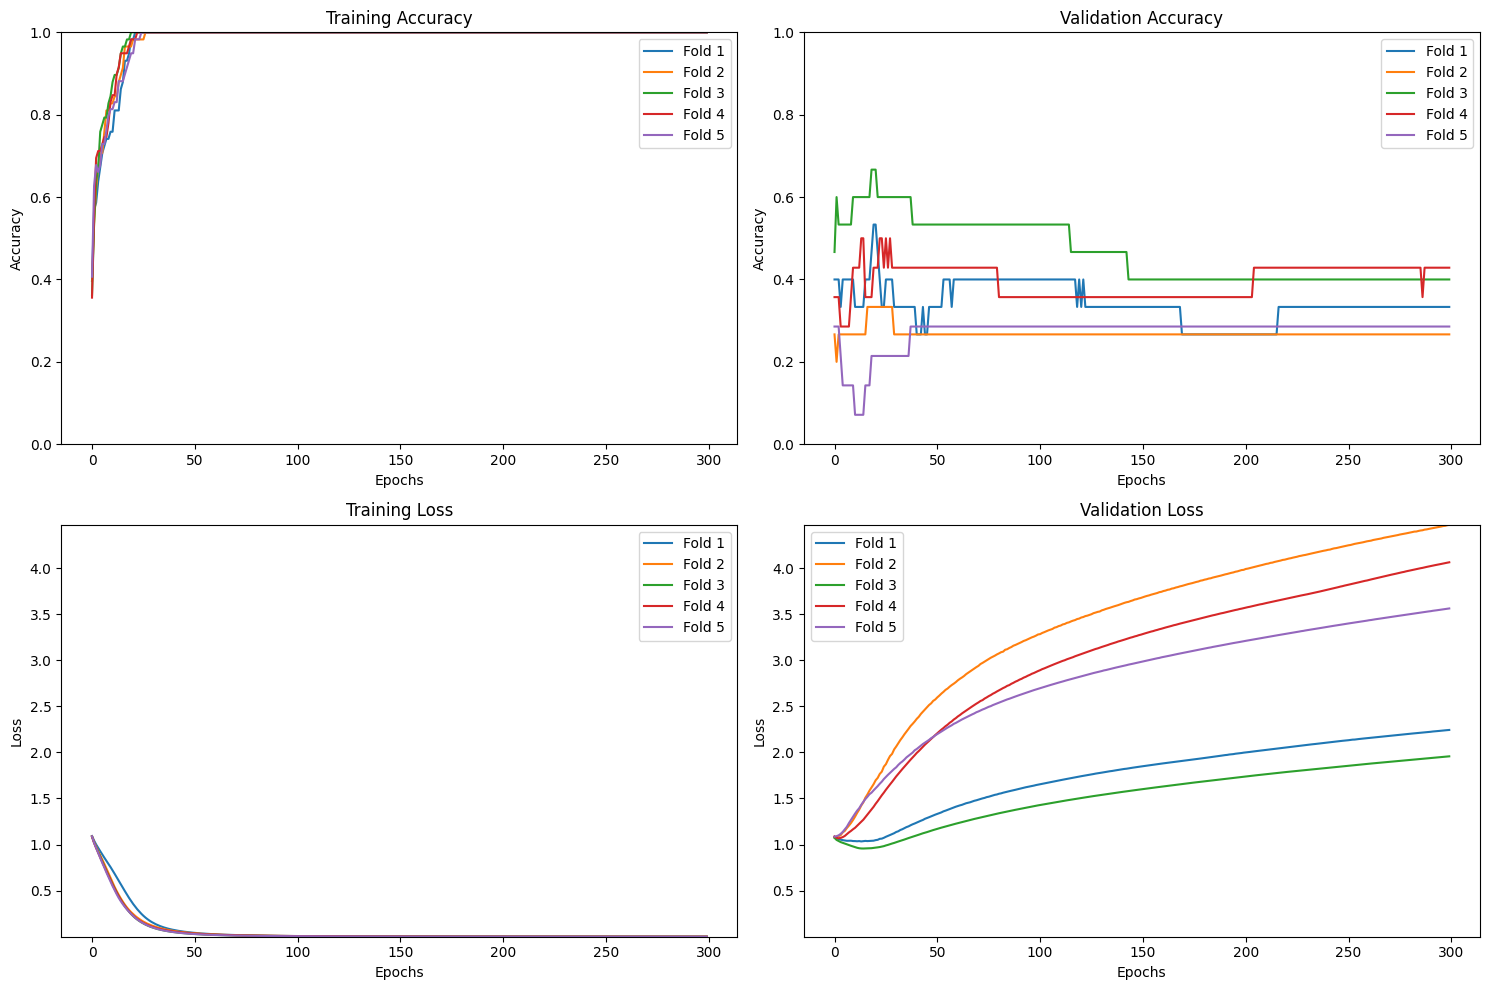

In [58]:
crossvalidate(df, model5, predictors, "class_pond", kf)

## Modeling ponds for different timepoints

### First timepoint 

In [ ]:
df_first_tp3 = df[df["timepoint"]==0]
reset_weights(model5)
crossvalidate(df_first_tp3, model5, predictors, "class_pond", kf)

### Second timepoint

Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4000 - loss: 2.0269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted classes:       [1 2 1 2 2]
true validation classes: [0 0 1 1 2]
mean confidence score: 14.6743, sd confidence score: 12.3725
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 2.6667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [0 2 2 1 0]
true validation classes: [1 1 1 2 2]
mean confidence score: 3.4736, sd confidence score: 3.6534
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0000e+00 - loss: 2.1553
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [1 1 2 0 1]
true validation classes: [0 0 1 2 2]
mean confidence score: 34.4571, sd confidence score: 65.9626
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2000 - loss: 2.2813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [1 2 1 0 1]
tru

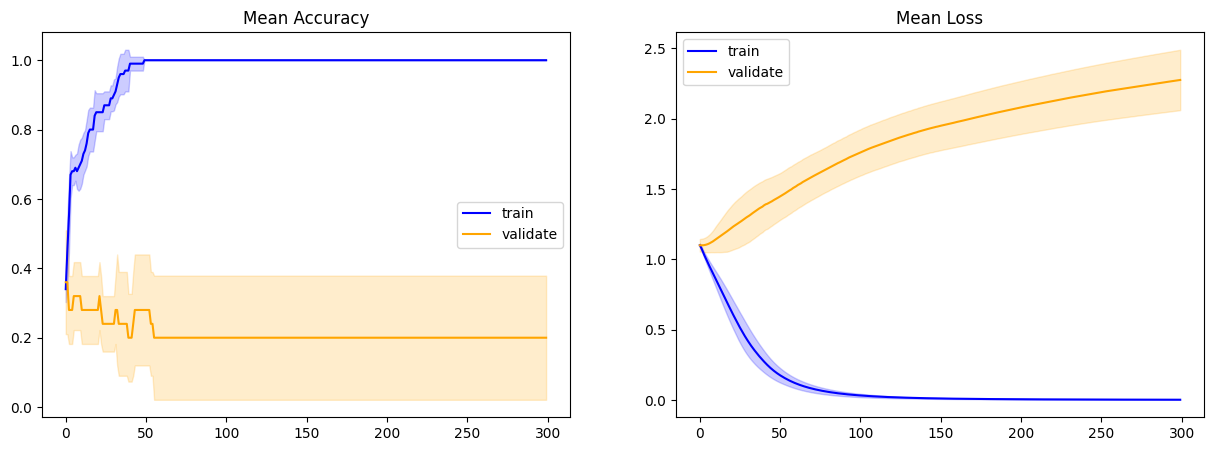

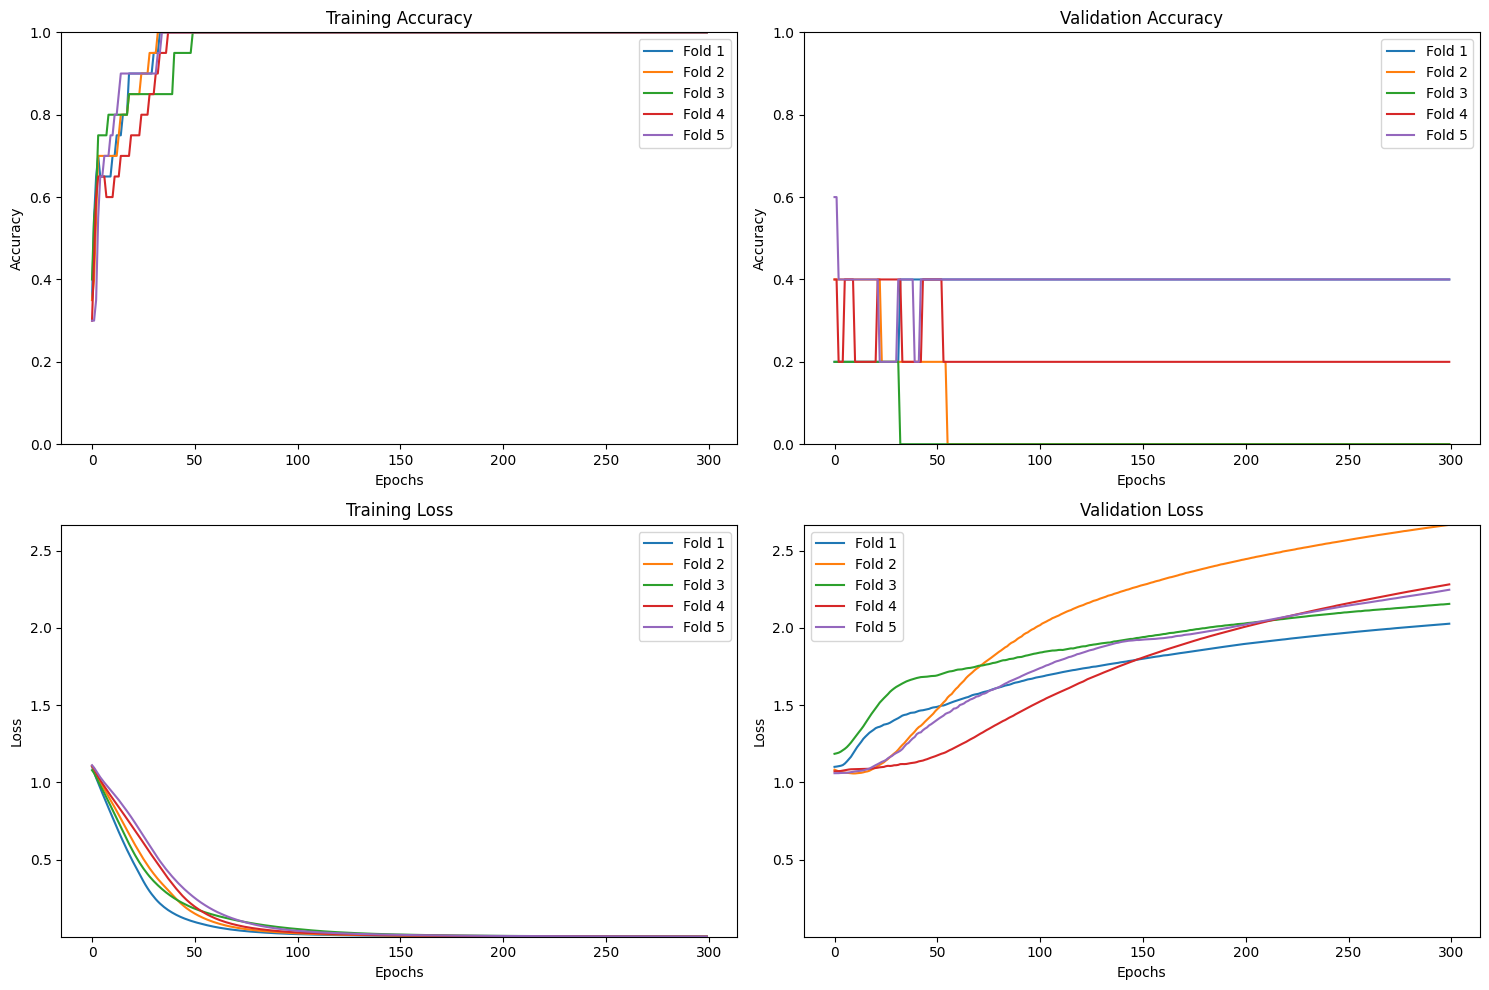

In [59]:
df_second_tp3 = df[df["timepoint"]==1]
reset_weights(model5)
crossvalidate(df_second_tp3, model5, predictors, "class_pond", kf)

### Third timepoint

Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4000 - loss: 2.9220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [2 1 1 2 2]
true validation classes: [0 0 1 1 2]
mean confidence score: 246.9761, sd confidence score: 386.3964
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2000 - loss: 2.1784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [2 0 0 2 1]
true validation classes: [1 1 1 2 2]
mean confidence score: 10.527, sd confidence score: 11.9161
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4000 - loss: 3.9313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [2 1 1 2 1]
true validation classes: [0 0 1 2 2]
mean confidence score: 378.7197, sd confidence score: 686.7651
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2000 - loss: 1.9679
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted classes:       [1 2 2 2 2]
true v

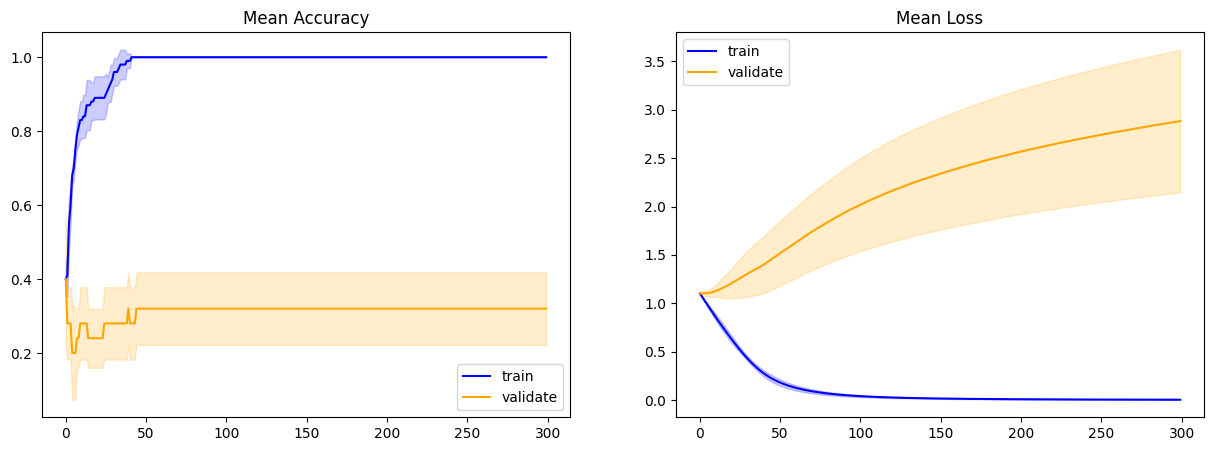

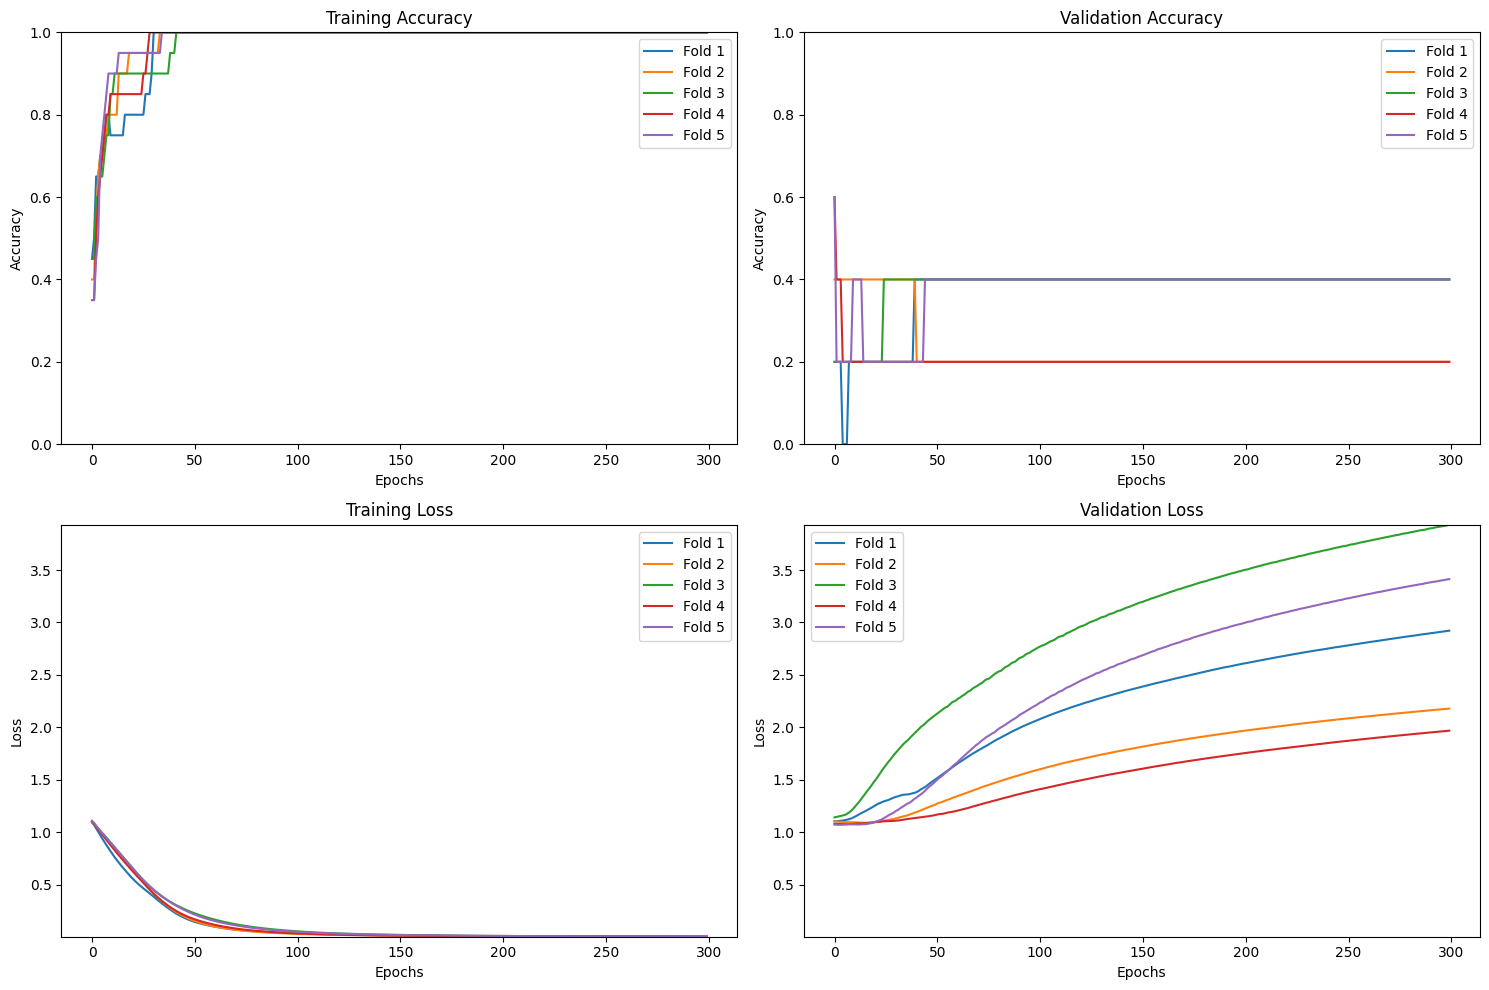

In [60]:
df_third_tp3 = df[df["timepoint"]==2]
reset_weights(model5)
crossvalidate(df_third_tp3, model5, predictors, "class_pond", kf)

We can note some general improvement of accuracy but its caused probably only because we reduced number of classes, nevertheless results are bad so we cant say that similar class redefinition helped and thus we cant say that enviromental supplementation had more impact that feed supplementation.

## Modeling ponds and timepoints at the same time 

In [26]:
df["class_timepointXpond"] = df["timepoint"].astype(str) + "_" + df["class_pond"].astype(str)
le = LabelEncoder()
df["class_timepointXpond_encoded"] = le.fit_transform(df["class_timepointXpond"])
df["class_timepointXpond_encoded"] = df["class_timepointXpond_encoded"].astype(int)

In [66]:
model6 = keras.Sequential()
model6.add(keras.layers.Dense(256,input_shape=(len(predictors),),activation='relu'))
model6.add(keras.layers.Dropout(rate=0.25))
model6.add(keras.layers.Dense(64, activation ='relu'))
model6.add(keras.layers.Dropout(rate=0.25))
model6.add(keras.layers.Dense(16, activation ='relu'))
model6.add(keras.layers.Dense(9, activation ='softmax'))

loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model6.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of classes: 9
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4667 - loss: 1.7679
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
predicted classes:       [8 8 6 5 3 3 7 4 8 5 2 8 2 5 8]
true validation classes: [6 7 7 4 4 4 7 4 7 5 2 5 2 5 8]
mean confidence score: 68.3204, sd confidence score: 92.3503
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2000 - loss: 3.7554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [1 6 2 7 1 7 8 1 1 4 1 4 1 1 3]
true validation classes: [0 3 0 1 1 7 8 2 2 5 2 5 2 2 5]
mean confidence score: 440.4978, sd confidence score: 545.6973
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5333 - loss: 1.7867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [4 5 4 7 4 8 4 6 4 8 5 2 7 7 8]
true validation classes: [3 3 4 7 4 7 4 7 5 8 5 2 8 5 8]
mean confidence score: 820.1552, sd confidence score: 2634.8307
training for 4 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19

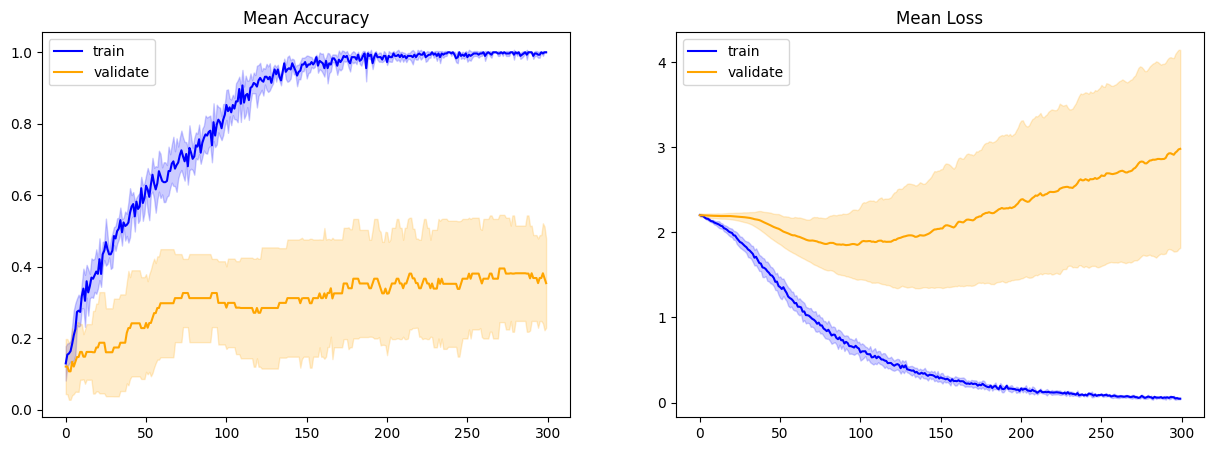

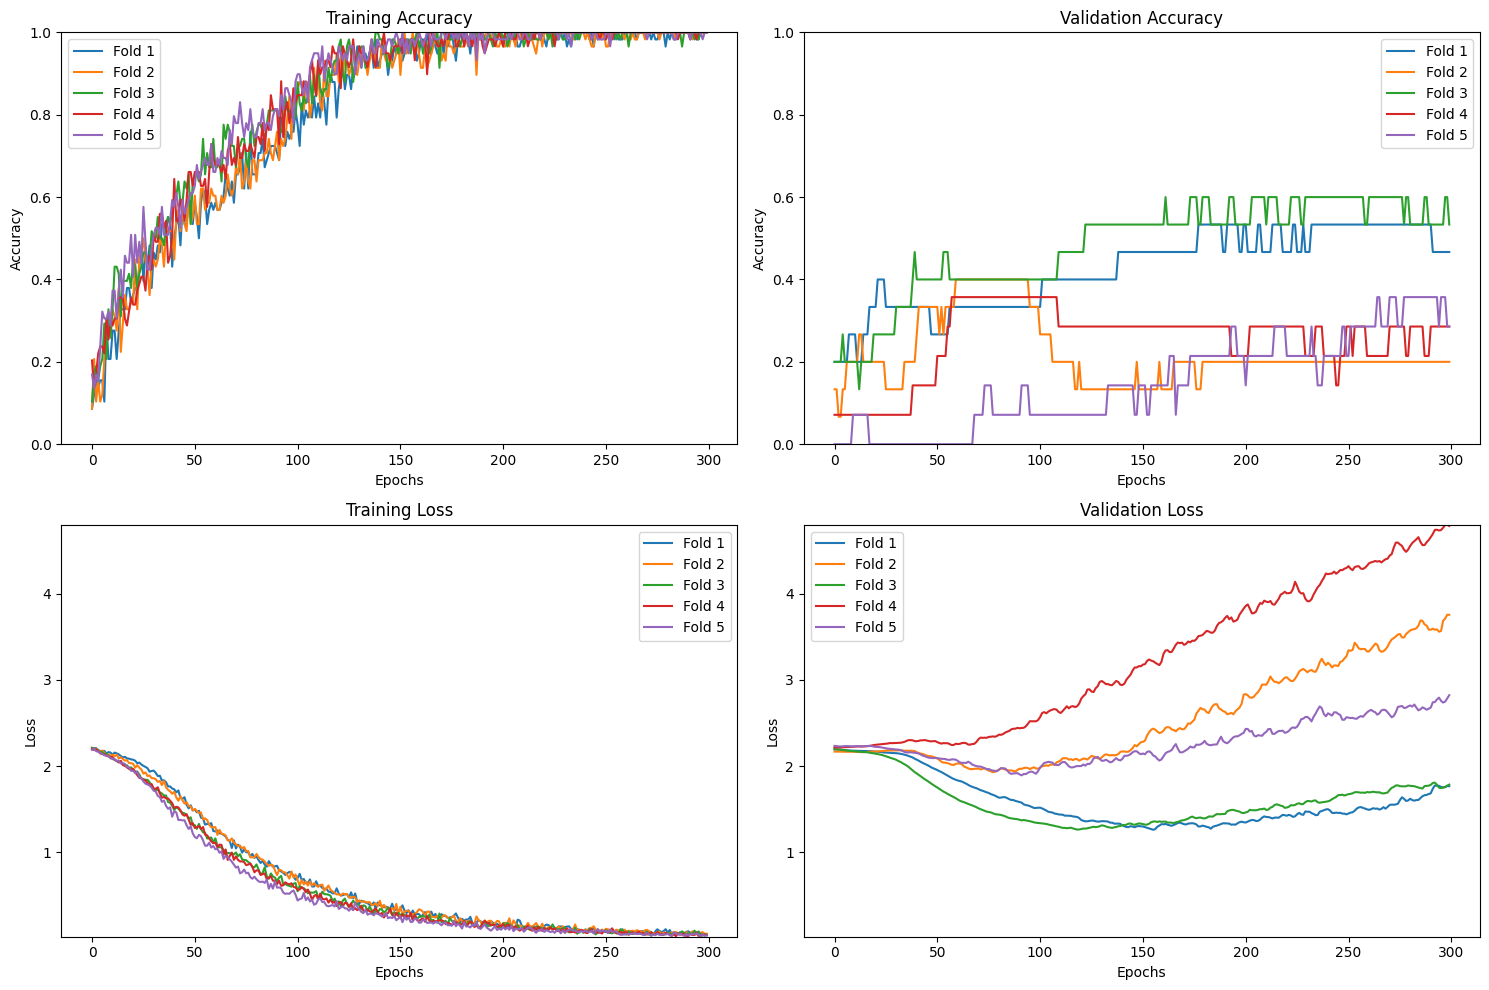

In [67]:
crossvalidate(df, model6, predictors, "class_timepointXpond_encoded", kf)

Final conclusion is that reducition of classes didnt improvement in any meaningfull way our results.

## XGBoost Comparison

### Modeling timepoints

In [16]:
X_train = train_val_df[predictors]
X_test = test_df[predictors]

In [17]:
dtrain = xgb.DMatrix(X_train, label=train_val_df['timepoint'], feature_names=predictors.to_list())
dtest = xgb.DMatrix(X_test, label=test_df['timepoint'], feature_names=predictors.to_list())

Accuracy1.0


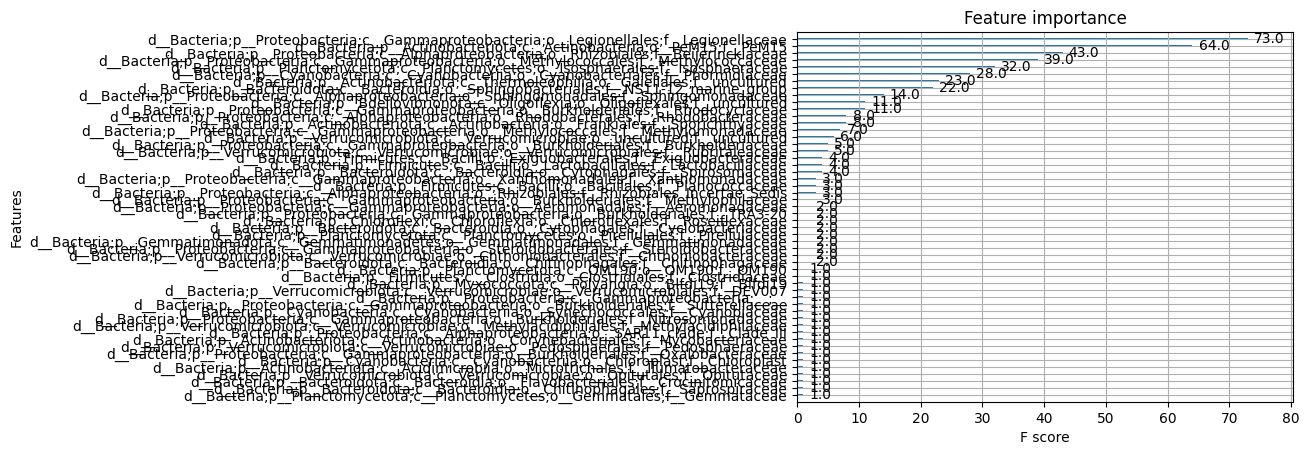

In [18]:
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3, # maximum deepth of the tree, used to controll complexity of the model
    'eta': 0.1,
    'seed': 111
}

x1 = xgb.train(params, dtrain, num_boost_round=100)
xgb.plot_importance(x1)
xgb_pred = x1.predict(dtest)
xgb_acc = accuracy_score(test_df['timepoint'], xgb_pred)
print(f"Accuracy{xgb_acc}")


[2 0 1 2 1 2 0 0 2 1 1 0 2 0 1]
[2. 0. 1. 2. 1. 2. 0. 0. 2. 1. 1. 0. 2. 0. 1.]
1.0


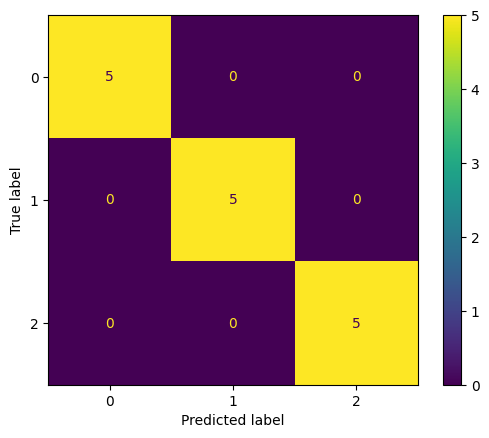

In [19]:
print(test_df['timepoint'].values)
print(xgb_pred)
print(xgb_acc)

cm = confusion_matrix(test_df['timepoint'].values, xgb_pred)
ConfusionMatrixDisplay(cm).plot()

We can note perfect accuracy for test dataset.

## Classifying ponds for both timepoints

In [20]:
train_val_df, test_df = train_test_split(df, test_size=0.3, random_state=111, stratify=df['class_pond'])

In [21]:
test_df['class_pond'].value_counts()    

class_pond
4    5
1    5
0    4
2    4
3    4
Name: count, dtype: int64

In [22]:
X_train = train_val_df[predictors]
X_test = test_df[predictors]

Accuracy0.22727272727272727
true: [0 2 3 4 0 4 4 3 1 1 2 0 4 3 1 2 2 1 3 0 4 1]
predicted: [1. 0. 0. 0. 2. 2. 0. 3. 1. 1. 0. 1. 2. 1. 1. 0. 4. 0. 0. 1. 4. 0.]


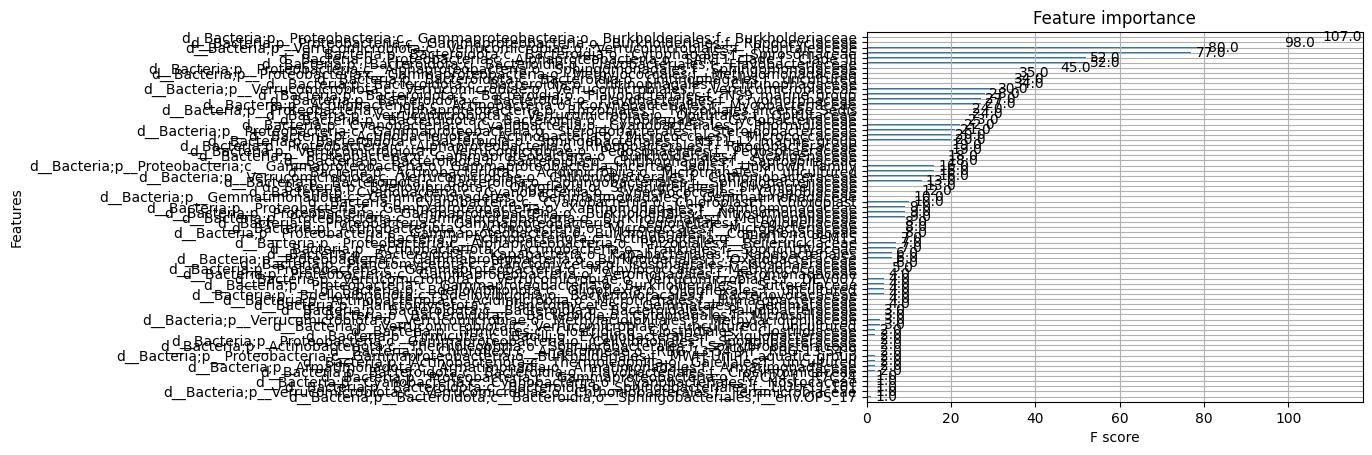

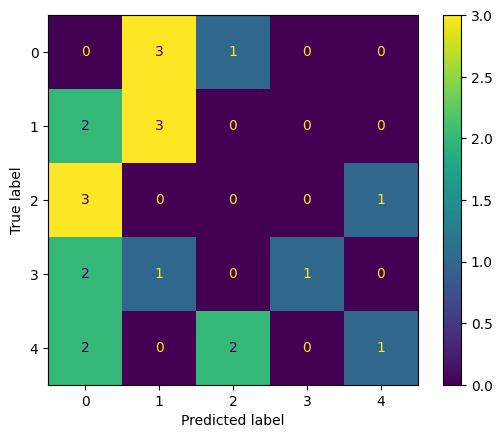

In [23]:
dtrain = xgb.DMatrix(X_train, label=train_val_df['class_pond'].values, feature_names=predictors.to_list())  
dtest = xgb.DMatrix(X_test, label=test_df['class_pond'].values, feature_names=predictors.to_list())
params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'max_depth': 3, # maximum deepth of the tree, used to controll complexity of the model
    'eta': 0.1,
    'seed': 111
}

x2 = xgb.train(params, dtrain, num_boost_round=100)

xgb_pred = x2.predict(dtest)
xgb_acc = accuracy_score(test_df['class_pond'].values, xgb_pred)

xgb.plot_importance(x2)

print(f"Accuracy{xgb_acc}")

print(f"true: {test_df['class_pond'].values}")
print(f"predicted: {xgb_pred}")

cm = confusion_matrix(test_df['class_pond'].values, xgb_pred)
ConfusionMatrixDisplay(cm).plot()

### Modeling ponds and timepoints at the same time

In [27]:
train_val_df, test_df = train_test_split(df, test_size=0.3, random_state=111, stratify=df['class_timepointXpond_encoded'])

Accuracy0.2727272727272727
true: [ 2  8 11 14  1 13 13 12  4  5  6  0 12  9  5  7  7  4 10  2 14  3]
predicted: [ 4. 13.  3. 10.  1. 13. 13. 11.  4.  6.  1.  5.  3.  7.  5.  9.  6.  4.
 11.  1.  3.  9.]


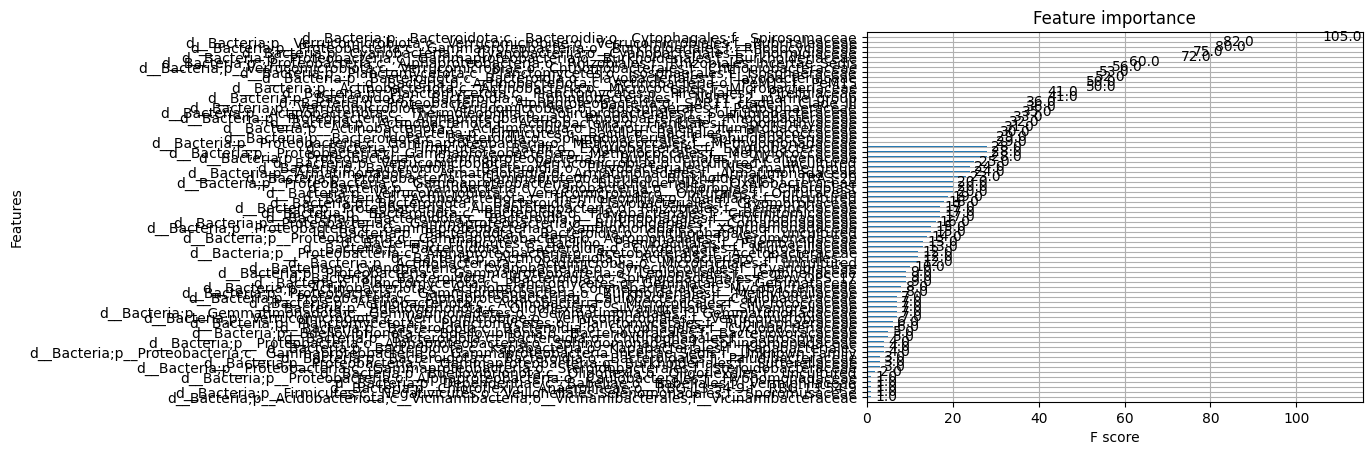

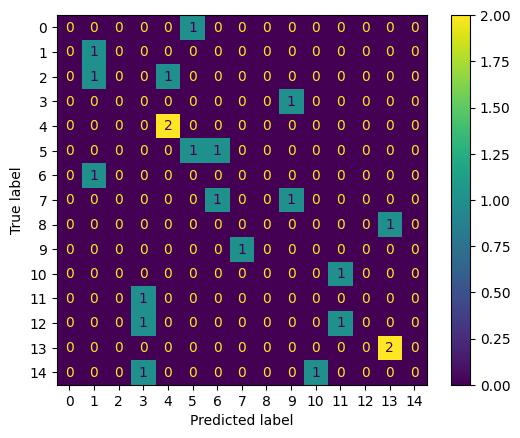

In [33]:
dtrain = xgb.DMatrix(train_val_df[predictors], label=train_val_df['class_timepointXpond_encoded'].values, feature_names=predictors.to_list())
dtest = xgb.DMatrix(test_df[predictors], label=test_df['class_timepointXpond_encoded'].values, feature_names=predictors.to_list())

params = {
    'objective': 'multi:softmax',
    'num_class': 15,
    'max_depth': 3, # maximum deepth of the tree, used to controll complexity of the model
    'eta': 0.1,
    'seed': 111
}

x2 = xgb.train(params, dtrain, num_boost_round=100)

xgb_pred = x2.predict(dtest)
xgb_acc = accuracy_score(test_df['class_timepointXpond_encoded'].values, xgb_pred)

xgb.plot_importance(x2)

print(f"Accuracy{xgb_acc}")

print(f"true: {test_df['class_timepointXpond_encoded'].values}")
print(f"predicted: {xgb_pred}")

cm = confusion_matrix(test_df['class_timepointXpond_encoded'].values, xgb_pred)
ConfusionMatrixDisplay(cm).plot()

In [42]:
encoding = pd.DataFrame({'orgiginal': test_df['class_timepointXpond'].values, 'encoded': test_df['class_timepointXpond_encoded'].values})
encoding.sort_values('encoded')


orgiginal  encoded
11       0_0        0
4        0_1        1
0        0_2        2
19       0_2        2
21       0_3        3
17       0_4        4
8        0_4        4
9        1_0        5
14       1_0        5
10       1_1        6
16       1_2        7
15       1_2        7
1        1_3        8
13       1_4        9
18       2_0       10
2        2_1       11
12       2_2       12
7        2_2       12
6        2_3       13
5        2_3       13
20       2_4       14
3        2_4       14

We can note that niether approach for trying to classify ponds didnt work out, this is the same results as for neural networks. Based on confusion matrix we can see that class 4 and 13 wchich were classified correctly in both cases.

Explanation of pond coding

| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|


THose correspond to:
- 4 -- timepoint 0 setup 4
- 13 -- timepoint 2 setup 3 

They do have same enviromental supplementation but its hard to draw more conclusions from that.

### Modeling ponds in 1 timepoint

In [52]:
df_first_tp_train, df_first_tp_test = train_test_split(df_first_tp, test_size=0.3, random_state=111, stratify=df_first_tp['class_pond'])
df_second_tp_train, df_second_tp_test = train_test_split(df_second_tp, test_size=0.3, random_state=111, stratify=df_second_tp['class_pond'])
df_third_tp_train, df_third_tp_test = train_test_split(df_third_tp, test_size=0.3, random_state=111, stratify=df_third_tp['class_pond'])
dtrain1tp = xgb.DMatrix(df_first_tp_train[predictors], label=df_first_tp_train['class_pond'].values, feature_names=predictors.to_list())
dtrain2tp = xgb.DMatrix(df_second_tp_train[predictors], label=df_second_tp_train['class_pond'].values, feature_names=predictors.to_list())
dtrain3tp = xgb.DMatrix(df_third_tp_train[predictors], label=df_third_tp_train['class_pond'].values, feature_names=predictors.to_list())
dtest1tp = xgb.DMatrix(df_first_tp_test[predictors], label=df_first_tp_test['class_pond'].values, feature_names=predictors.to_list())
dtest2tp = xgb.DMatrix(df_second_tp_test[predictors], label=df_second_tp_test['class_pond'].values, feature_names=predictors.to_list())
dtest3tp = xgb.DMatrix(df_third_tp_test[predictors], label=df_third_tp_test['class_pond'].values, feature_names=predictors.to_list())

params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'max_depth': 3, # maximum deepth of the tree, used to controll complexity of the model
    'eta': 0.1,
    'seed': 111
}


Accuracy0.14285714285714285


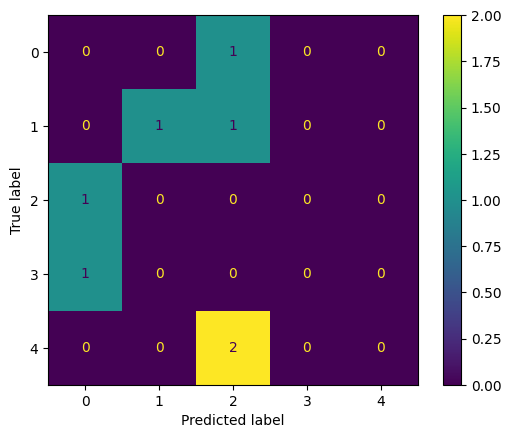

In [53]:
# first timepoint
x3 = xgb.train(params, dtrain1tp, num_boost_round=100)
xgb_pred = x3.predict(dtest1tp)
xgb_acc = accuracy_score(df_first_tp_test['class_pond'].values, xgb_pred)
print(f"Accuracy{xgb_acc}")
cm = confusion_matrix(df_first_tp_test['class_pond'].values, xgb_pred)
ConfusionMatrixDisplay(cm).plot()

Accuracy0.375


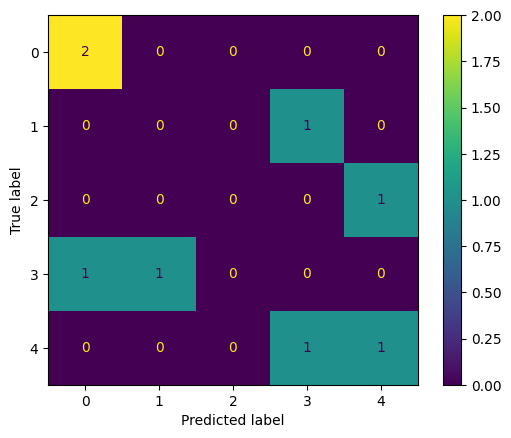

In [54]:
# second timepoint
x3 = xgb.train(params, dtrain2tp, num_boost_round=100)
xgb_pred = x3.predict(dtest2tp)
xgb_acc = accuracy_score(df_second_tp_test['class_pond'].values, xgb_pred)
print(f"Accuracy{xgb_acc}")
cm = confusion_matrix(df_second_tp_test['class_pond'].values, xgb_pred)
ConfusionMatrixDisplay(cm).plot()

Accuracy0.375


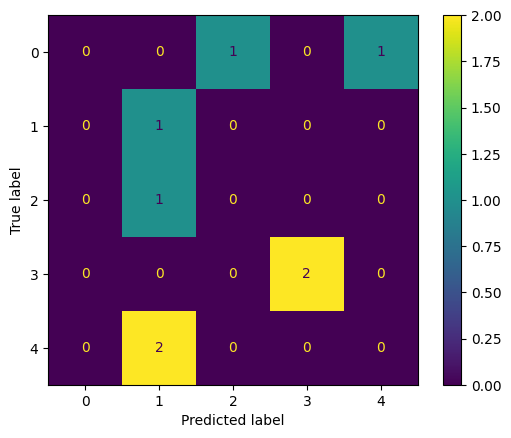

In [55]:
# third timepoint
x3 = xgb.train(params, dtrain3tp, num_boost_round=100)
xgb_pred = x3.predict(dtest3tp)
xgb_acc = accuracy_score(df_third_tp_test['class_pond'].values, xgb_pred)
print(f"Accuracy{xgb_acc}")
cm = confusion_matrix(df_third_tp_test['class_pond'].values, xgb_pred)
ConfusionMatrixDisplay(cm).plot()
